In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

import os
import gc
from pathlib import Path

from pandas.api.types import is_categorical_dtype
from pandas.api.types import is_datetime64_any_dtype as is_datetime


In [98]:
root = Path('/Users/leannechen/Documents/Ashrae-Energy-Prediction-III/site') # Change the path to the source file path, use Memory_Management.py to generate files in feather format 
train_df = pd.read_feather(root/'train.feather')
weather_train_df = pd.read_feather(root/'weather_train.feather')
building_meta_df = pd.read_feather(root/'building_metadata.feather')

In [5]:
print('\n--- Shape of train data ---\n', train_df.shape)


--- Shape of train data ---
 (20216100, 4)


In [6]:
print('\n---Information of the train data --- \n')
print(train_df.info())


---Information of the train data --- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   building_id    int16         
 1   meter          int8          
 2   timestamp      datetime64[ns]
 3   meter_reading  float32       
dtypes: datetime64[ns](1), float32(1), int16(1), int8(1)
memory usage: 289.2 MB
None


In [7]:
print('\n ---Column names of the train data --- \n', train_df.columns)


 ---Column names of the train data --- 
 Index(['building_id', 'meter', 'timestamp', 'meter_reading'], dtype='object')


In [8]:
print('\n---Below is the statistics of the train data---\n\n',train_df.describe())


---Below is the statistics of the train data---

         building_id         meter  meter_reading
count  2.021610e+07  2.021610e+07   2.021610e+07
mean   7.992780e+02  6.624412e-01   2.117122e+03
std    4.269133e+02  9.309921e-01   1.532159e+05
min    0.000000e+00  0.000000e+00   0.000000e+00
25%    3.930000e+02  0.000000e+00   1.830000e+01
50%    8.950000e+02  0.000000e+00   7.877500e+01
75%    1.179000e+03  1.000000e+00   2.679840e+02
max    1.448000e+03  3.000000e+00   2.190470e+07


In [9]:
print('\n---Below is the first 5 lines of the train data---\n',train_df.head(5))


---Below is the first 5 lines of the train data---
    building_id  meter  timestamp  meter_reading
0            0      0 2016-01-01            0.0
1            1      0 2016-01-01            0.0
2            2      0 2016-01-01            0.0
3            3      0 2016-01-01            0.0
4            4      0 2016-01-01            0.0


In [10]:
print('\n--- Shape of weather train data---\n', weather_train_df.shape)


--- Shape of weather_train data---
 (139773, 9)


In [11]:
print('\n---Information of the weather train dataset --- \n')
print(weather_train_df.info())


---Information of the weather_train dataset --- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   site_id             139773 non-null  int8          
 1   timestamp           139773 non-null  datetime64[ns]
 2   air_temperature     139718 non-null  float32       
 3   cloud_coverage      70600 non-null   float32       
 4   dew_temperature     139660 non-null  float32       
 5   precip_depth_1_hr   89484 non-null   float32       
 6   sea_level_pressure  129155 non-null  float32       
 7   wind_direction      133505 non-null  float32       
 8   wind_speed          139469 non-null  float32       
dtypes: datetime64[ns](1), float32(7), int8(1)
memory usage: 4.9 MB
None


In [12]:
print('\n ---Column names of the weather train dataset --- \n', weather_train_df.columns)


 ---Column names of the weather_train dataset --- 
 Index(['site_id', 'timestamp', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'],
      dtype='object')


In [13]:
print('\n---Below is the statistics of the weather train dataset---\n\n',weather_train_df.describe())


---Below is the statistics of the weather_train dataset---

              site_id  air_temperature  cloud_coverage  dew_temperature  \
count  139773.000000    139718.000000    70600.000000    139660.000000   
mean        7.478977        14.418107        2.149306         7.350158   
std         4.604744        10.626660        2.599485         9.790945   
min         0.000000       -28.900000        0.000000       -35.000000   
25%         3.000000         7.200000        0.000000         0.600000   
50%         7.000000        15.000000        2.000000         8.300000   
75%        11.000000        22.200001        4.000000        14.400000   
max        15.000000        47.200001        9.000000        26.100000   

       precip_depth_1_hr  sea_level_pressure  wind_direction     wind_speed  
count       89484.000000       129155.000000   133505.000000  139469.000000  
mean            0.983047         1016.158081      180.526627       3.560527  
std             8.465291            7

In [14]:
print('\n---Below is the first 5 lines of the weather train dataset---\n',weather_train_df.head(5))


---Below is the first 5 lines of the weather_train dataset---
    site_id           timestamp  air_temperature  cloud_coverage  \
0        0 2016-01-01 00:00:00        25.000000             6.0   
1        0 2016-01-01 01:00:00        24.400000             NaN   
2        0 2016-01-01 02:00:00        22.799999             2.0   
3        0 2016-01-01 03:00:00        21.100000             2.0   
4        0 2016-01-01 04:00:00        20.000000             2.0   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_direction  \
0             20.0                NaN         1019.700012             0.0   
1             21.1               -1.0         1020.200012            70.0   
2             21.1                0.0         1020.200012             0.0   
3             20.6                0.0         1020.099976             0.0   
4             20.0               -1.0         1020.000000           250.0   

   wind_speed  
0         0.0  
1         1.5  
2         0.0  
3     

In [15]:
print('\n--- Shape of building_meta data---\n', building_meta_df.shape)


--- Shape of building_meta data---
 (1449, 6)


In [16]:
print('\n---Information of the building metadata dataset --- \n')
print(building_meta_df.info())


---Information of the building_metadata dataset --- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   site_id      1449 non-null   int8    
 1   building_id  1449 non-null   int16   
 2   primary_use  1449 non-null   category
 3   square_feet  1449 non-null   int32   
 4   year_built   675 non-null    float32 
 5   floor_count  355 non-null    float32 
dtypes: category(1), float32(2), int16(1), int32(1), int8(1)
memory usage: 23.4 KB
None


In [17]:
print('\n ---Column names of the building meta dataset --- \n', building_meta_df.columns)


 ---Column names of the building_meta dataset --- 
 Index(['site_id', 'building_id', 'primary_use', 'square_feet', 'year_built',
       'floor_count'],
      dtype='object')


In [18]:
print('\n---Below is the statistics of the building meta dataset---\n\n',building_meta_df.describe())


---Below is the statistics of the building_meta dataset---

            site_id  building_id    square_feet   year_built  floor_count
count  1449.000000  1449.000000    1449.000000   675.000000   355.000000
mean      6.952381   724.000000   92111.776398  1967.957031     3.740845
std       5.003432   418.434583  110769.950997    31.054047     3.333680
min       0.000000     0.000000     283.000000  1900.000000     1.000000
25%       3.000000   362.000000   23012.000000  1949.000000     1.000000
50%       5.000000   724.000000   57673.000000  1970.000000     3.000000
75%      13.000000  1086.000000  115676.000000  1995.000000     5.000000
max      15.000000  1448.000000  875000.000000  2017.000000    26.000000


In [19]:
print('\n---Below is the first 5 lines of the building meta dataset---\n',building_meta_df.head(5))


---Below is the first 5 lines of the building_meta dataset---
    site_id  building_id primary_use  square_feet  year_built  floor_count
0        0            0   Education         7432      2008.0          NaN
1        0            1   Education         2720      2004.0          NaN
2        0            2   Education         5376      1991.0          NaN
3        0            3   Education        23685      2002.0          NaN
4        0            4   Education       116607      1975.0          NaN


Reducing the memory usage of the data 

In [99]:
def reduce_mem_usage(df, use_float16=False):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        if is_datetime(df[col]) or is_categorical_dtype(df[col]):
            # skip datetime type or categorical type
            continue
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if use_float16 and c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(
        100 * (start_mem - end_mem) / start_mem))

    return df

In [100]:
train_df=reduce_mem_usage(train_df)
weather_train_df=reduce_mem_usage(weather_train_df)
building_meta_df=reduce_mem_usage(building_meta_df)

Memory usage of dataframe is 289.19 MB
Memory usage after optimization is: 289.19 MB
Decreased by 0.0%
Memory usage of dataframe is 4.93 MB
Memory usage after optimization is: 4.93 MB
Decreased by 0.0%
Memory usage of dataframe is 0.02 MB
Memory usage after optimization is: 0.02 MB
Decreased by 0.0%


Merging data 

In [101]:
train_merge = train_df.merge(building_meta_df, on='building_id', how='left')
train_merge = train_merge.merge(weather_train_df, on=['site_id', 'timestamp'], how='left')

In [102]:
train_merge=reduce_mem_usage(train_merge)

gc.collect()

Memory usage of dataframe is 1253.17 MB
Memory usage after optimization is: 1253.17 MB
Decreased by 0.0%


91906

In [24]:
print('\n--- Shape of merging data---\n', train_merge.shape)


--- Shape of merging data---
 (20216100, 16)


In [25]:
print('\n---Information of the train merged dataset --- \n')
print(train_merge.info())


---Information of the train_merge dataset --- 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   building_id         int16         
 1   meter               int8          
 2   timestamp           datetime64[ns]
 3   meter_reading       float32       
 4   site_id             int8          
 5   primary_use         category      
 6   square_feet         int32         
 7   year_built          float32       
 8   floor_count         float32       
 9   air_temperature     float32       
 10  cloud_coverage      float32       
 11  dew_temperature     float32       
 12  precip_depth_1_hr   float32       
 13  sea_level_pressure  float32       
 14  wind_direction      float32       
 15  wind_speed          float32       
dtypes: category(1), datetime64[ns](1), float32(10), int16(1), int32(1), int8(2)
memory usage: 1.2 GB
None


In [26]:
print('\n ---Column names of the train merged dataset --- \n', train_merge.columns)


 ---Column names of the train_merge dataset --- 
 Index(['building_id', 'meter', 'timestamp', 'meter_reading', 'site_id',
       'primary_use', 'square_feet', 'year_built', 'floor_count',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed'],
      dtype='object')


In [27]:
print('\n---Below is the statistics of the train merged dataset---\n\n',train_merge.describe())


---Below is the statistics of the train_merge dataset---

         building_id         meter  meter_reading       site_id   square_feet  \
count  2.021610e+07  2.021610e+07   2.021610e+07  2.021610e+07  2.021610e+07   
mean   7.992780e+02  6.624412e-01   2.117122e+03  7.992232e+00  1.077830e+05   
std    4.269133e+02  9.309921e-01   1.532159e+05  5.099060e+00  1.171424e+05   
min    0.000000e+00  0.000000e+00   0.000000e+00  0.000000e+00  2.830000e+02   
25%    3.930000e+02  0.000000e+00   1.830000e+01  3.000000e+00  3.252700e+04   
50%    8.950000e+02  0.000000e+00   7.877500e+01  9.000000e+00  7.270900e+04   
75%    1.179000e+03  1.000000e+00   2.679840e+02  1.300000e+01  1.391130e+05   
max    1.448000e+03  3.000000e+00   2.190470e+07  1.500000e+01  8.750000e+05   

         year_built   floor_count  air_temperature  cloud_coverage  \
count  8.088455e+06  3.506933e+06     2.011944e+07    1.139074e+07   
mean   1.968276e+03  4.184848e+00     1.598795e+01    1.900424e+00   
std    7.

By looking at the train_merge data, the large difference between mean and max for meter_reading showing there are some strong outliers.

In [28]:
print('\n---Below is the first 5 lines of the train merged dataset---\n',train_merge.head(5))


---Below is the first 5 lines of the train_merge dataset---
    building_id  meter  timestamp  meter_reading  site_id primary_use  \
0            0      0 2016-01-01            0.0        0   Education   
1            1      0 2016-01-01            0.0        0   Education   
2            2      0 2016-01-01            0.0        0   Education   
3            3      0 2016-01-01            0.0        0   Education   
4            4      0 2016-01-01            0.0        0   Education   

   square_feet  year_built  floor_count  air_temperature  cloud_coverage  \
0         7432      2008.0          NaN             25.0             6.0   
1         2720      2004.0          NaN             25.0             6.0   
2         5376      1991.0          NaN             25.0             6.0   
3        23685      2002.0          NaN             25.0             6.0   
4       116607      1975.0          NaN             25.0             6.0   

   dew_temperature  precip_depth_1_hr  sea_level

In [29]:
categories_columns=['meter','site_id']
for i in categories_columns:
    unique_cat=set(train_merge[i])
    print(f"{i}: {unique_cat}")

meter: {0, 1, 2, 3}
site_id: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}


In [103]:
meter_values = train_merge['meter'].unique()
site_id_values =train_merge['site_id'].unique()
building_id_values = train_merge['building_id'].unique()
primary_use_values = train_merge['primary_use'].unique()
year_built_values = train_merge['year_built'].unique()

building_id_values.sort()
year_built_values.sort()

# Print the results
print("Unique meter values:", meter_values)
print("Unique site_id values:", site_id_values)
print("Unique building_id values:", building_id_values)
print("Unique primary_use values:", primary_use_values)
print("Unique year_built values (sorted):", year_built_values)

Unique meter values: [0 3 1 2]
Unique site_id values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Unique building_id values: [   0    1    2 ... 1446 1447 1448]
Unique primary_use values: ['Education', 'Lodging/residential', 'Office', 'Entertainment/public assembly', 'Other', ..., 'Healthcare', 'Utility', 'Technology/science', 'Manufacturing/industrial', 'Services']
Length: 16
Categories (16, object): ['Education', 'Entertainment/public assembly', 'Food sales and service', 'Healthcare', ..., 'Services', 'Technology/science', 'Utility', 'Warehouse/storage']
Unique year_built values (sorted): [1900. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911. 1912.
 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920. 1921. 1922. 1923. 1924.
 1925. 1926. 1927. 1928. 1929. 1930. 1931. 1932. 1933. 1934. 1935. 1936.
 1937. 1938. 1939. 1940. 1941. 1942. 1944. 1945. 1946. 1947. 1948. 1949.
 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961.
 1962. 1963. 1964. 1965. 1966. 

# Correlation 

/var/folders/rf/wjq1b2355sj9qtby772s1_tc0000gn/T/ipykernel_8096/1256264761.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_train=train_df.corr().round(2)


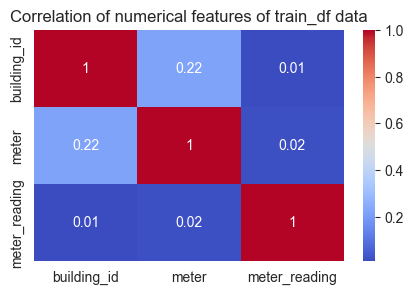

In [104]:
corr_train=train_df.corr().round(2)

fig, ax = plt.subplots(figsize=(5,3))  
sns.heatmap(corr_train,annot=True,ax=ax,cmap='coolwarm')
ax.set_title('Correlation of numerical features of train_df data')
plt.show()

/var/folders/rf/wjq1b2355sj9qtby772s1_tc0000gn/T/ipykernel_8096/353087008.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_weather=weather_train_df.corr().round(2)


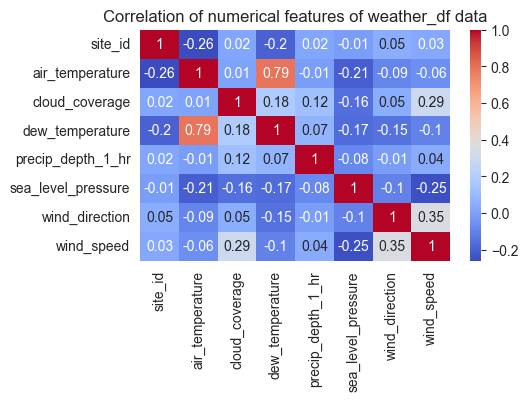

In [105]:
corr_weather=weather_train_df.corr().round(2)

fig, ax = plt.subplots(figsize=(5,3))  
sns.heatmap(corr_weather,annot=True,ax=ax,cmap='coolwarm')
ax.set_title('Correlation of numerical features of weather_df data')
plt.show()

/var/folders/rf/wjq1b2355sj9qtby772s1_tc0000gn/T/ipykernel_8096/959270985.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_building=building_meta_df.corr().round(2)


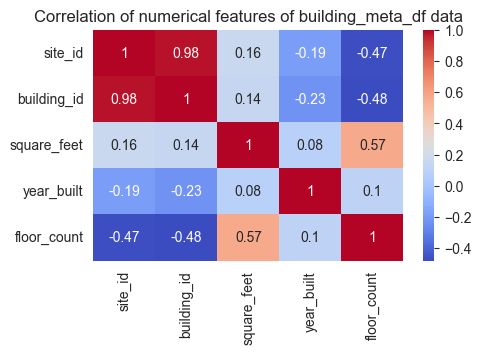

In [95]:
corr_building=building_meta_df.corr().round(2)

fig, ax = plt.subplots(figsize=(5,3))  
sns.heatmap(corr_building,annot=True,ax=ax,cmap='coolwarm')
ax.set_title('Correlation of numerical features of building_meta_df data')
plt.show()

/var/folders/rf/wjq1b2355sj9qtby772s1_tc0000gn/T/ipykernel_8096/30517239.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=train_merge.corr().round(2)


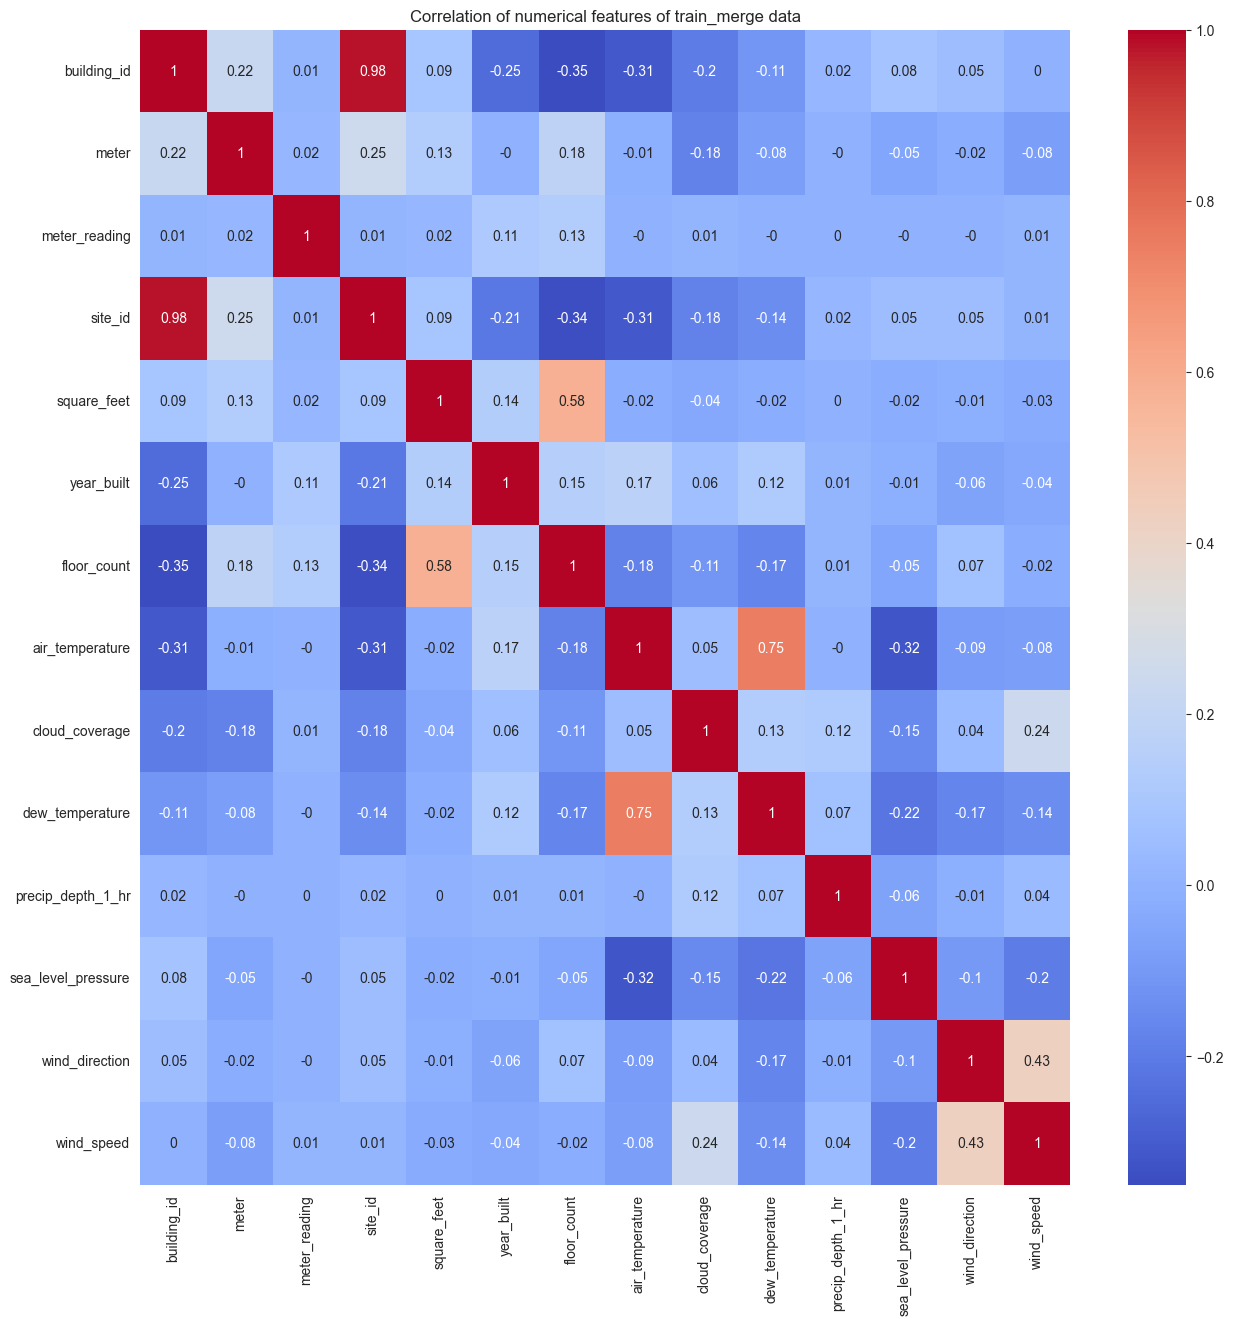

In [106]:
correlation=train_merge.corr().round(2)

fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(correlation,annot=True,cmap='coolwarm')
ax.set_title('Correlation of numerical features of train_merge data')
plt.show()

square_feet, year_built,and floor_count have the highest correlation values with the meter_reading

Check the null values 

In [107]:
null_train = train_df.apply(lambda x: sum(x.isnull())).to_frame(name= 'NaN count')
print(null_train)

               NaN count
building_id            0
meter                  0
timestamp              0
meter_reading          0


In [108]:
del null_train
gc.collect()

48307

In [35]:
null_weather = weather_train_df.apply(lambda x: sum(x.isnull())).to_frame(name= 'NaN count')
print(null_weather)

                    NaN count
site_id                     0
timestamp                   0
air_temperature            55
cloud_coverage          69173
dew_temperature           113
precip_depth_1_hr       50289
sea_level_pressure      10618
wind_direction           6268
wind_speed                304


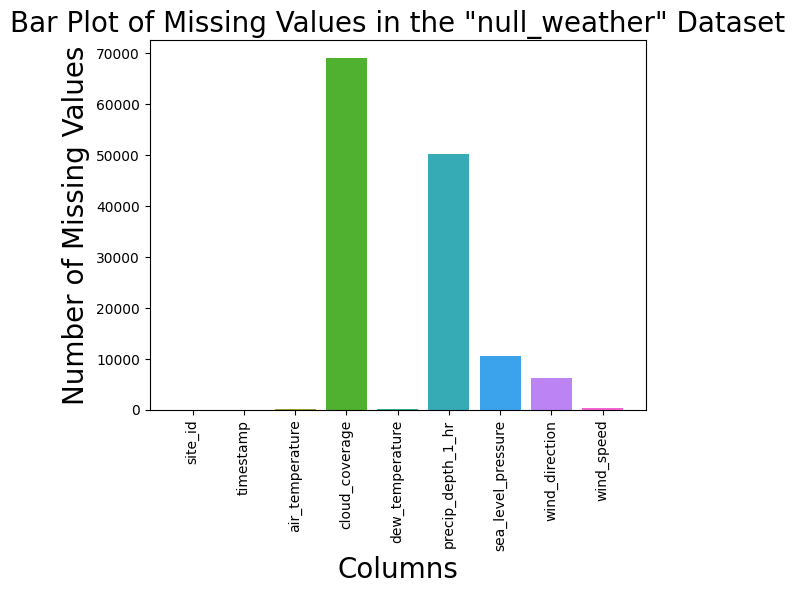

In [36]:
my_palette = sns.color_palette('husl', len(null_weather))
plt.bar(null_weather.index, null_weather['NaN count'], color=my_palette)
plt.xticks(rotation=90)
plt.xlabel('Columns',fontdict={'fontsize': 20})
plt.ylabel('Number of Missing Values',fontdict={'fontsize': 20})
plt.title('Bar Plot of Missing Values in the "null_weather" Dataset',fontdict={'fontsize': 20})
plt.show()

In [109]:
del null_weather
gc.collect()

0

In [37]:
null_building = building_meta_df.apply(lambda x: sum(x.isnull())).to_frame(name= 'NaN count')
print(null_building)

             NaN count
site_id              0
building_id          0
primary_use          0
square_feet          0
year_built         774
floor_count       1094


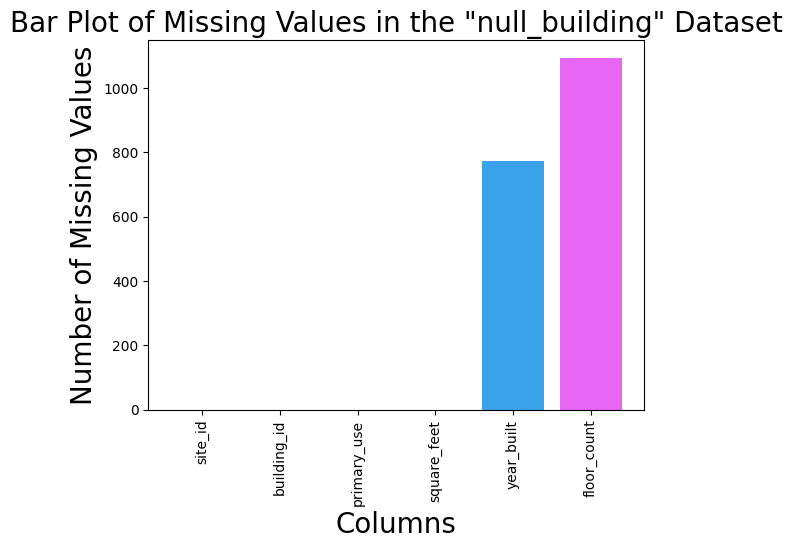

In [38]:
my_palette = sns.color_palette('husl', len(null_building))
plt.bar(null_building.index, null_building['NaN count'], color=my_palette)
plt.xticks(rotation=90)
plt.xlabel('Columns',fontdict={'fontsize': 20})
plt.ylabel('Number of Missing Values',fontdict={'fontsize': 20})
plt.title('Bar Plot of Missing Values in the "null_building" Dataset',fontdict={'fontsize': 20})
plt.show()

In [41]:
del null_building
gc.collect()

In [39]:
null_train_merge = train_merge.apply(lambda x: sum(x.isnull())).to_frame(name= 'NaN count')
print(null_train_merge)

                    NaN count
building_id                 0
meter                       0
timestamp                   0
meter_reading               0
site_id                     0
primary_use                 0
square_feet                 0
year_built           12127645
floor_count          16709167
air_temperature         96658
cloud_coverage        8825365
dew_temperature        100140
precip_depth_1_hr     3749023
sea_level_pressure    1231669
wind_direction        1449048
wind_speed             143676


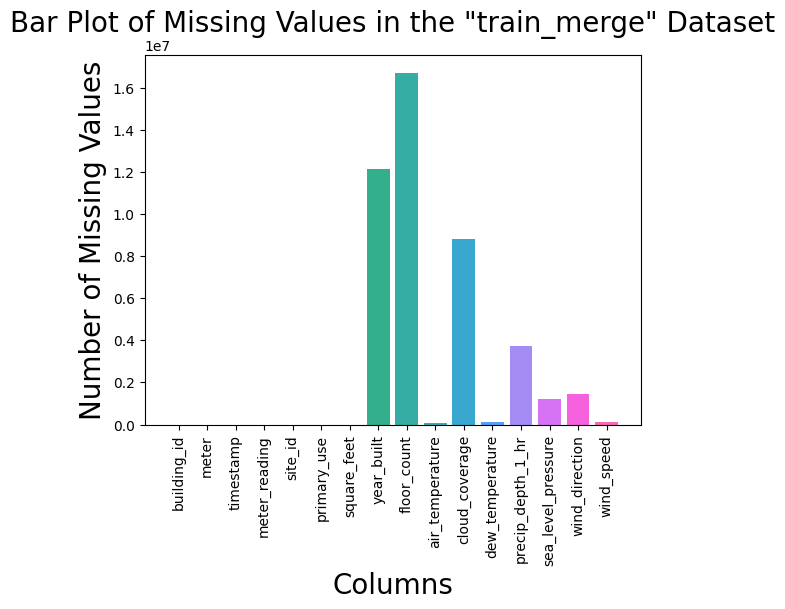

In [42]:
my_palette = sns.color_palette('husl', len(null_train_merge))
plt.bar(null_train_merge.index, null_train_merge['NaN count'], color=my_palette)
plt.xticks(rotation=90)
plt.xlabel('Columns',fontdict={'fontsize': 20})
plt.ylabel('Number of Missing Values',fontdict={'fontsize': 20})
plt.title('Bar Plot of Missing Values in the "train_merge" Dataset',fontdict={'fontsize': 20})
plt.show()

In [110]:
del null_train_merge
gc.collect()

0

Visualize missing values (NaN) as a Matrix 

/Users/leannechen/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/matplotlib/image.py:180: UserWarning: Data with more than 2**24 rows cannot be accurately displayed. Downsampling to less than 2**24 rows before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**24 rows'))


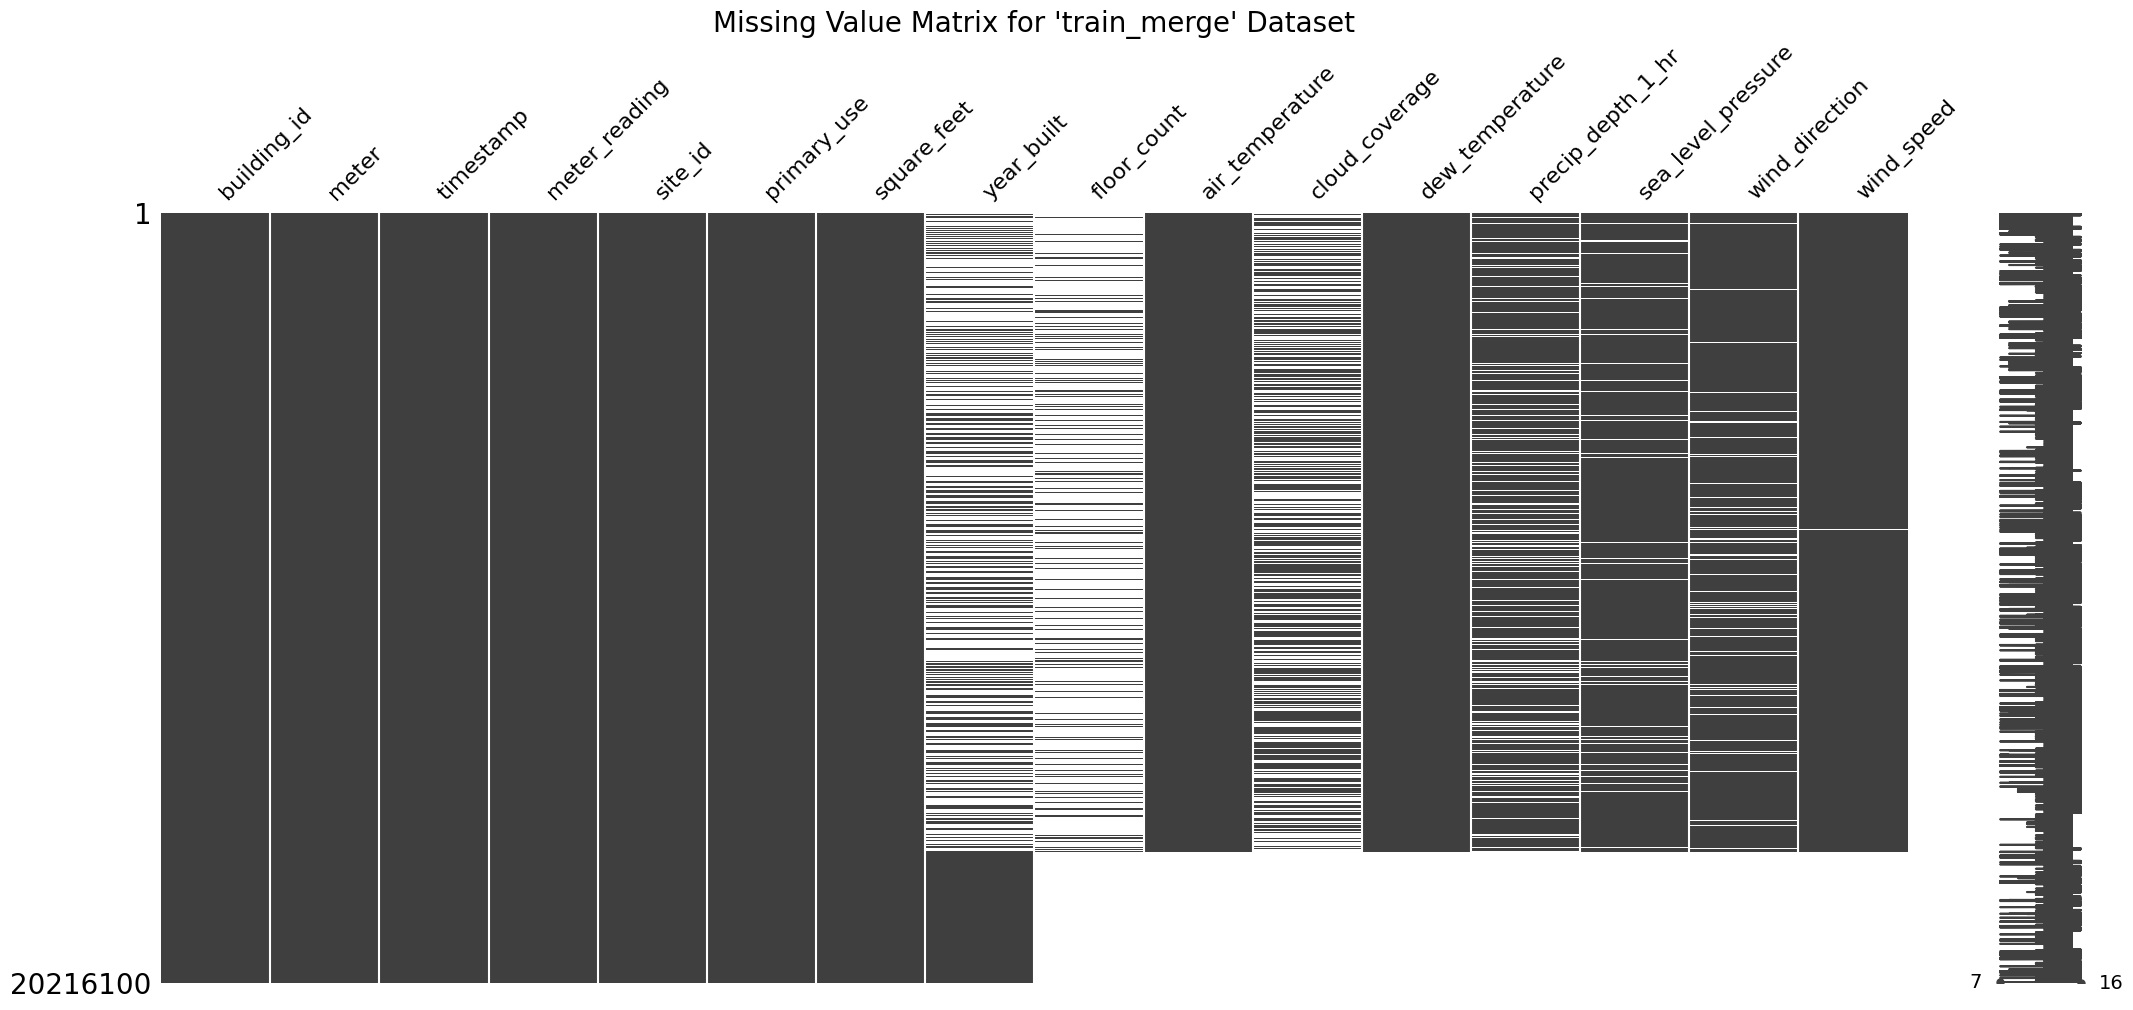

In [43]:
msno.matrix(train_merge)
plt.title("Missing Value Matrix for 'train_merge' Dataset", fontdict={'fontsize': 20})
plt.show()

year_built, floor_count, and cloud coverage are columns having the most NaN values. 

# Outliers 

In [44]:
def boxplot_func(dFrame, fea_list):
  f, ax = plt.subplots(1, len(fea_list), figsize=(25,10))
  for i in range(len(fea_list)):
    sns.boxplot(data = dFrame[fea_list[i]], ax = ax[i])
    ax[i].set_xlabel(fea_list[i])

In [113]:
def plot_boxplot(df, column_name):
    min_val = df[column_name].min()
    max_val = df[column_name].max()
    avg_val = df[column_name].mean()
    std_val = df[column_name].std()
    # Create a list with the statistics values
    stats_values = [min_val, max_val, avg_val, std_val]
    # Create a list with the actual column values
    data_values = df[column_name].dropna()
    plt.boxplot(data_values)
    # Add horizontal lines for the statistics values
    plt.axhline(y=min_val, color='r', linestyle='-')
    plt.axhline(y=max_val, color='r', linestyle='-')
    plt.axhline(y=avg_val, color='g', linestyle='-')
    plt.axhline(y=avg_val-std_val, color='y', linestyle='--')
    plt.axhline(y=avg_val+std_val, color='y', linestyle='--')
    plt.xlabel(column_name, fontsize=20)
    plt.title(f'{column_name} in train data', fontsize=20)
    plt.ylabel('Values', fontsize=20)
    plt.show()

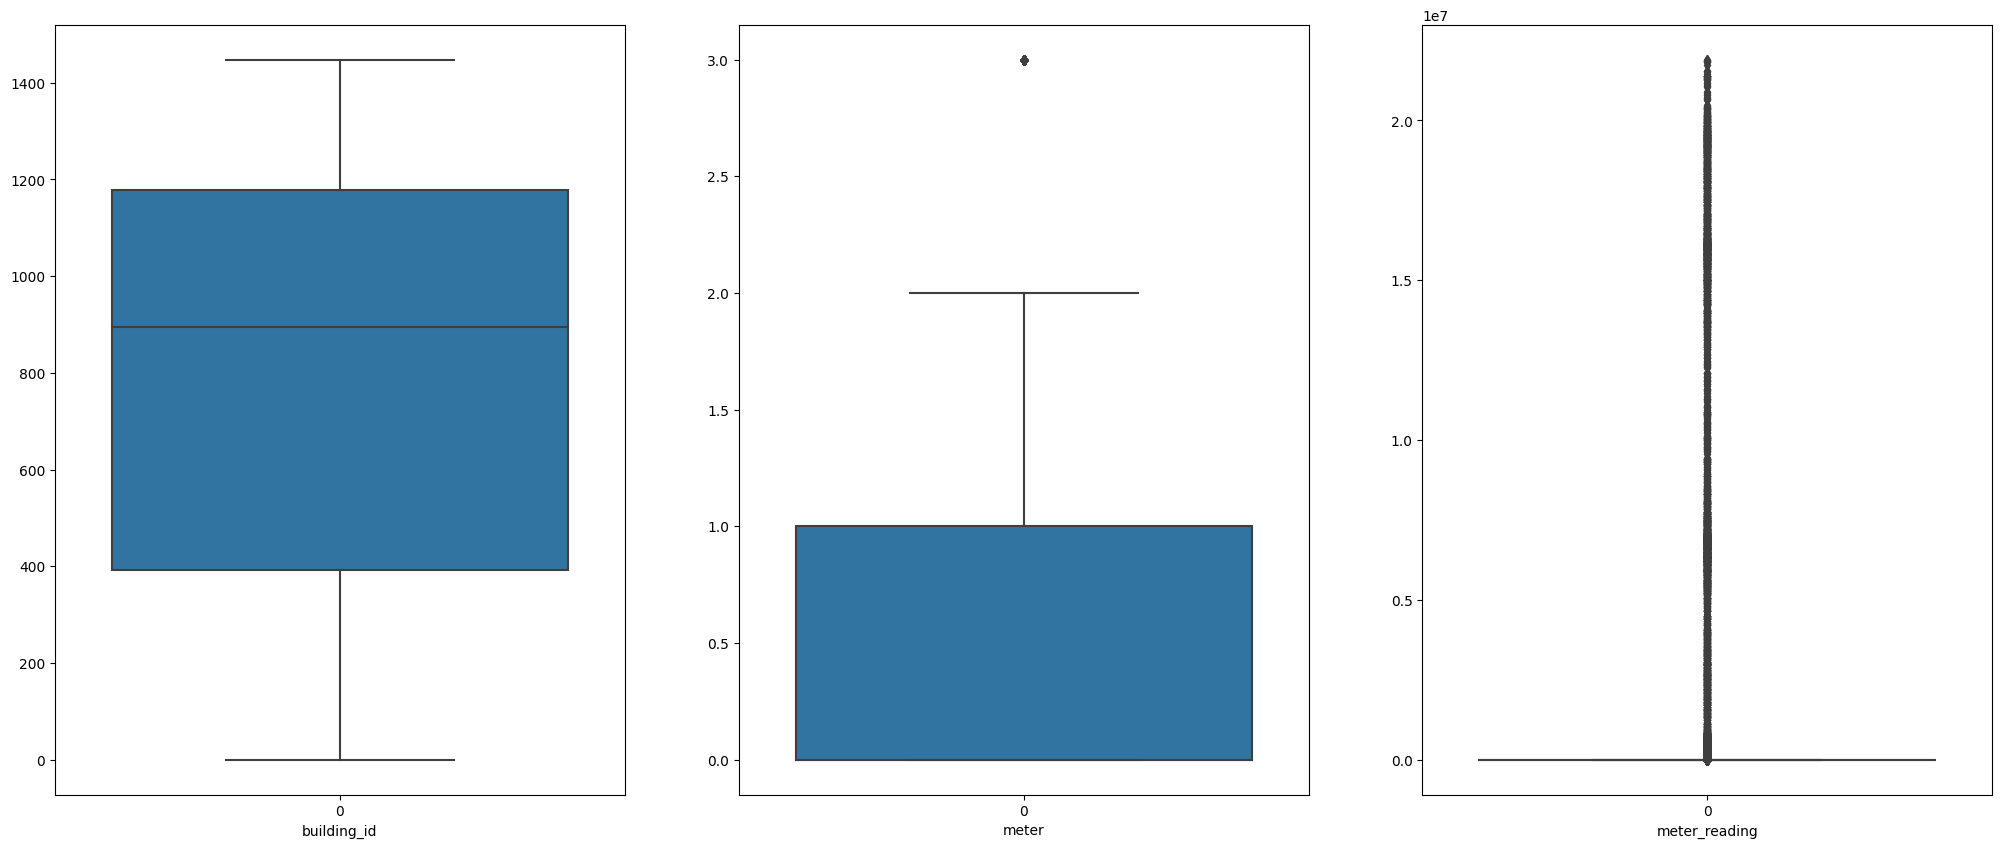

In [46]:
#outlier in train_df
boxplot_func(train_df,['building_id', 'meter', 'meter_reading'])
plt.show()

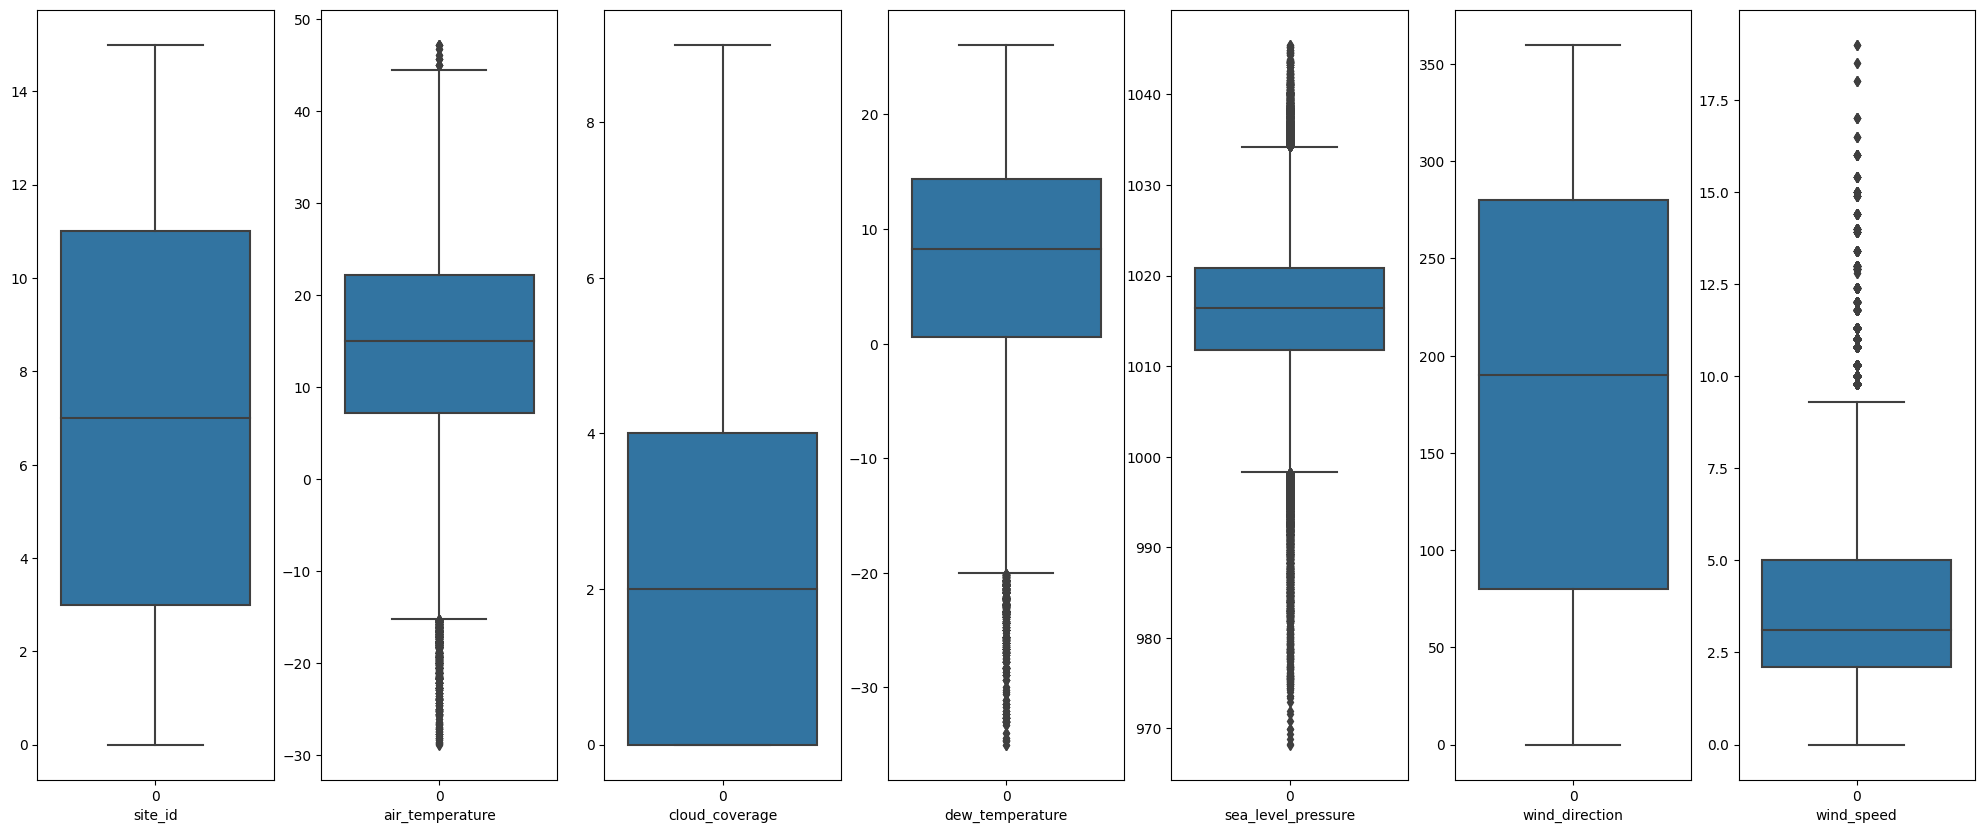

In [47]:
#outlier in weather_train_df
boxplot_func(weather_train_df,['site_id', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'sea_level_pressure',
       'wind_direction', 'wind_speed'])
plt.show()

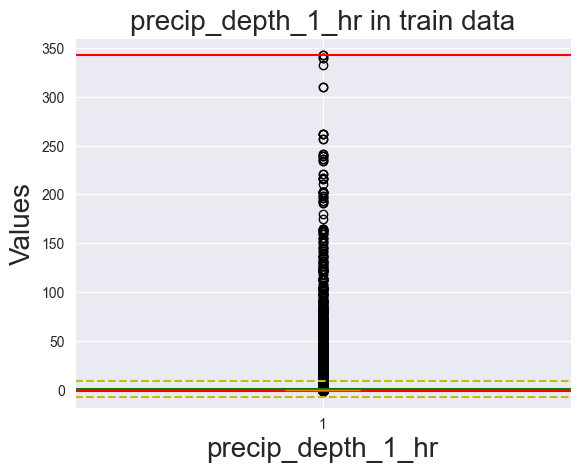

In [114]:
plot_boxplot(weather_train_df,'precip_depth_1_hr')

In [49]:
weather_train_df['precip_depth_1_hr'].describe()

count    89484.000000
mean         0.983047
std          8.465291
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        343.000000
Name: precip_depth_1_hr, dtype: float64

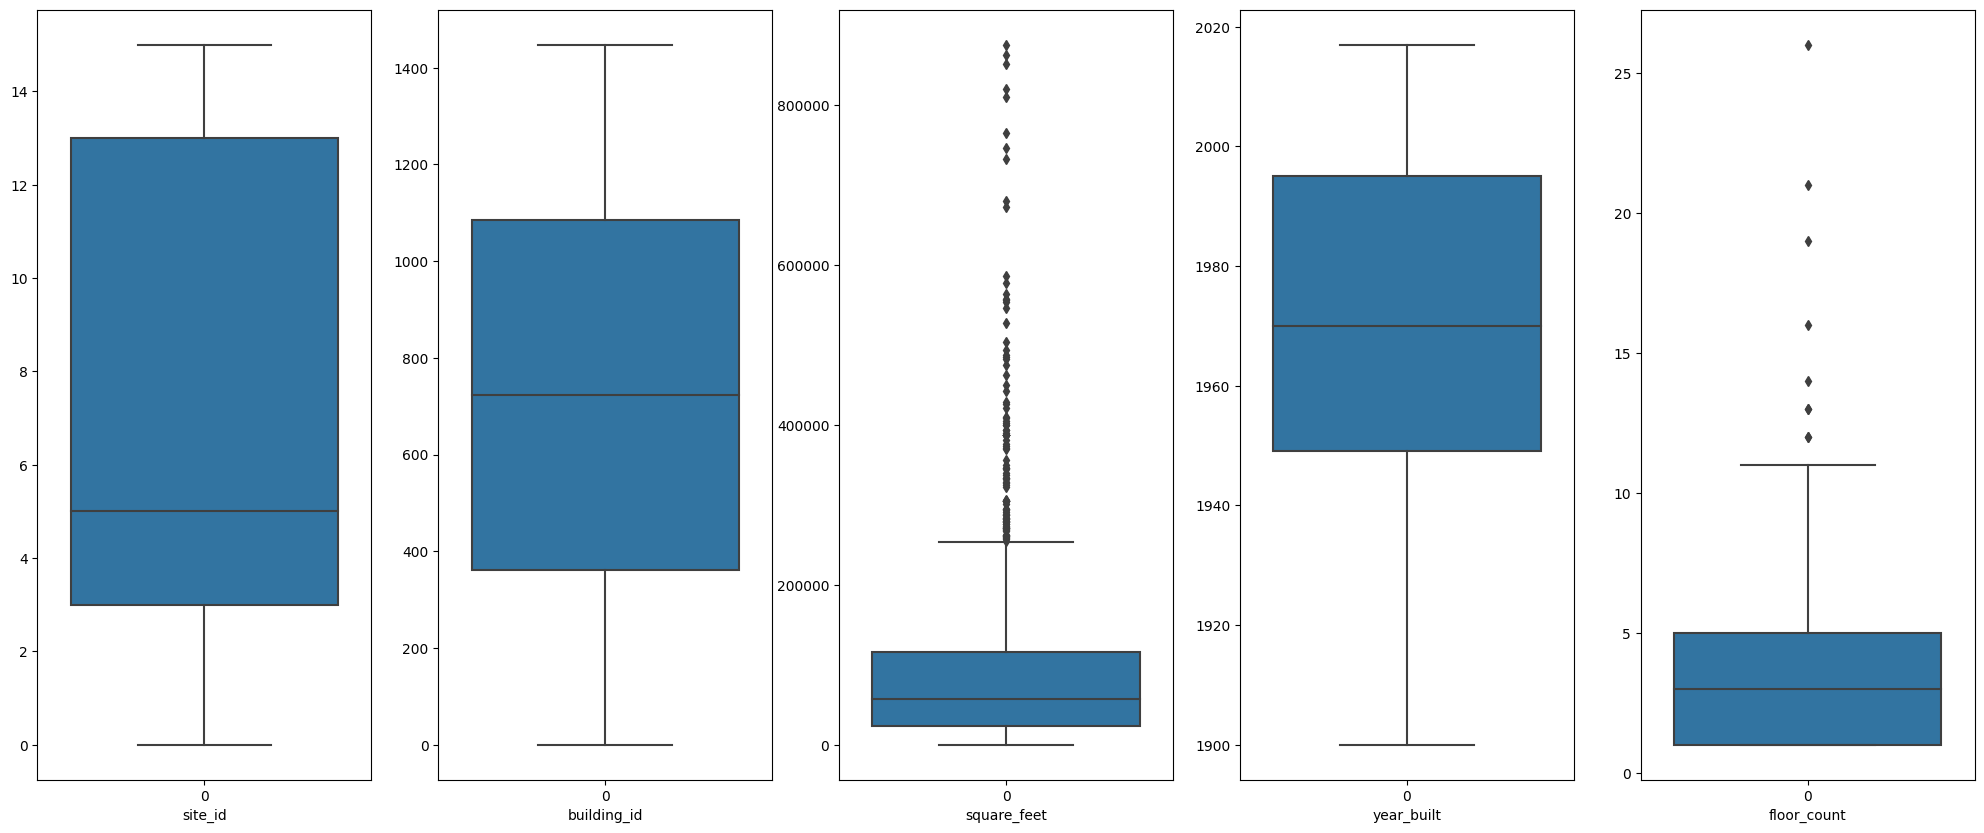

In [50]:
#outlier in building_meta_df
boxplot_func(building_meta_df,['site_id', 'building_id', 'square_feet', 'year_built',
       'floor_count'])
plt.show()

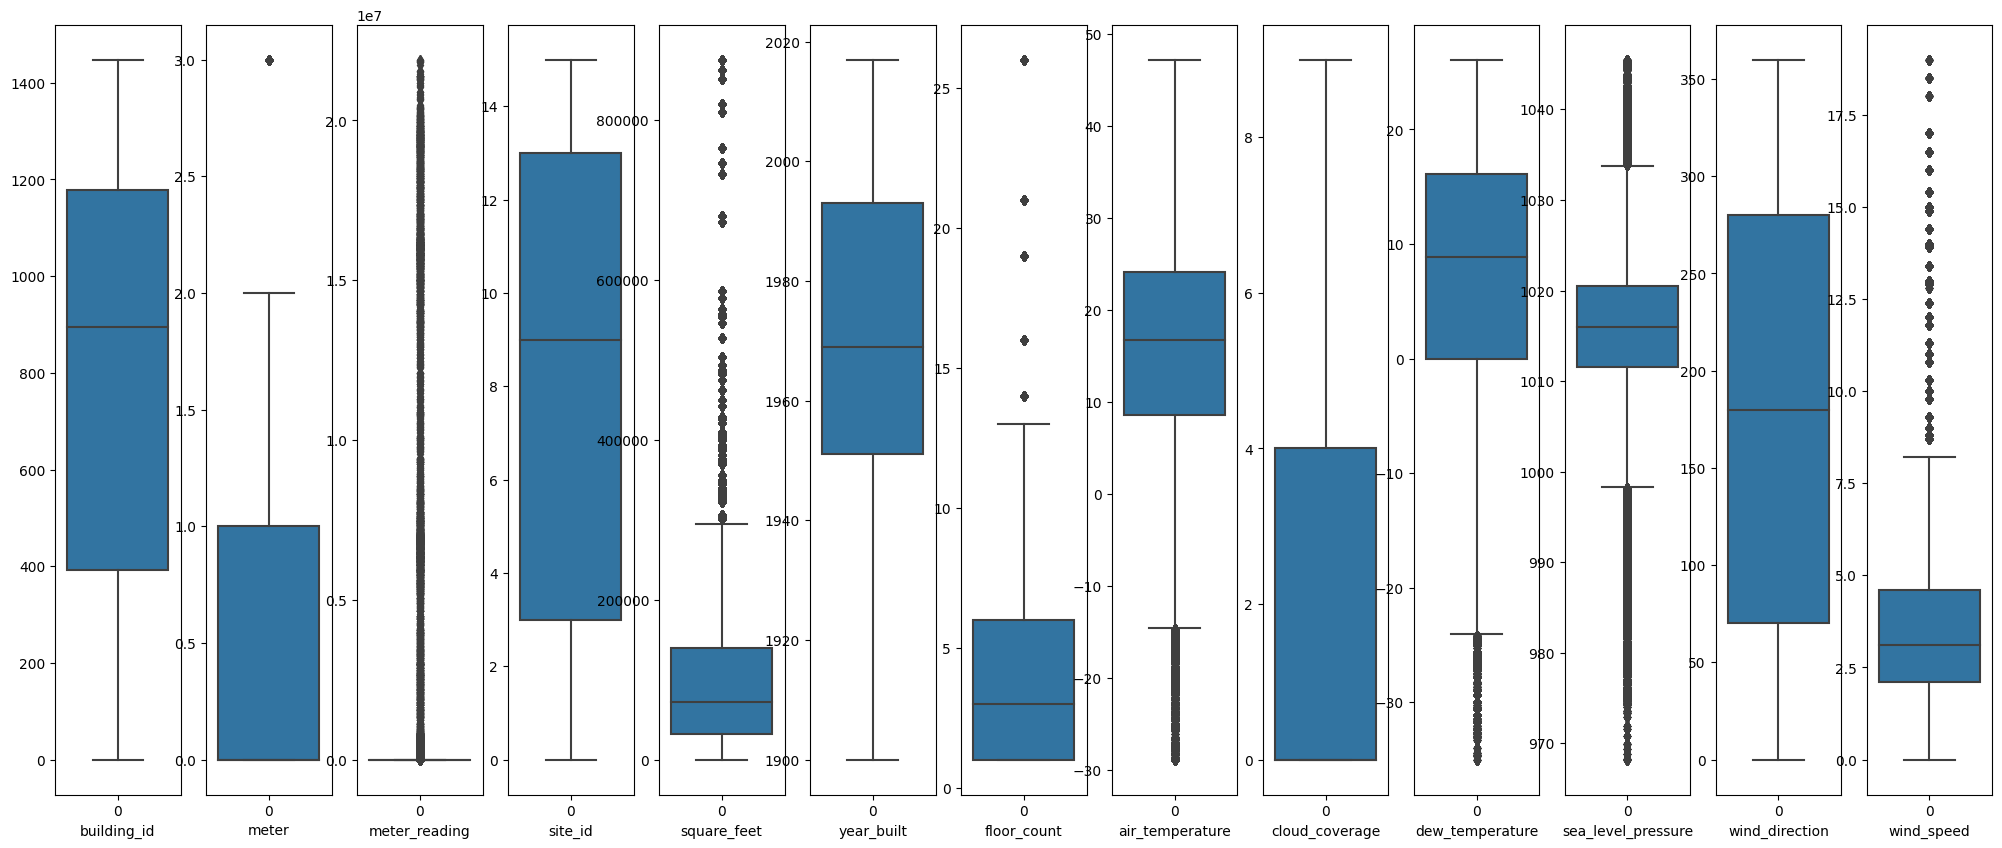

In [51]:
#outlier in train_merge
boxplot_func(train_merge,['building_id', 'meter', 'meter_reading', 'site_id',
       'square_feet', 'year_built', 'floor_count',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'sea_level_pressure', 'wind_direction',
       'wind_speed'])
plt.show()

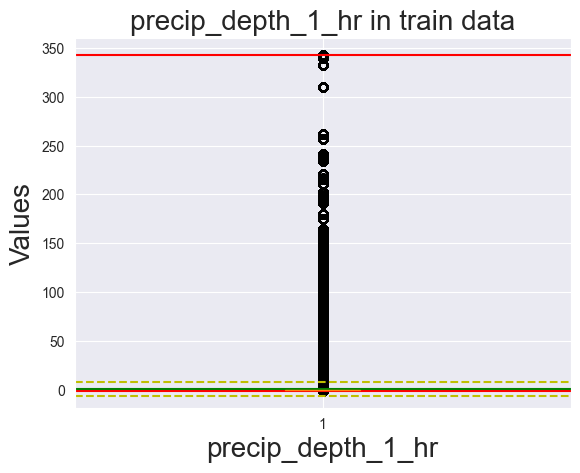

In [115]:
plot_boxplot(train_merge,'precip_depth_1_hr')

In [53]:
train_merge['precip_depth_1_hr'].describe()

count    1.646708e+07
mean     7.964156e-01
std      7.416368e+00
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.430000e+02
Name: precip_depth_1_hr, dtype: float64

Breaking Timestamp into Hour, Day, Month, Year
(firstly converts timestamp to date and then breaks down date into 6 new columns: hour, day, dayOfWeek, dayOfYear, month and year)

In [54]:
def breakdown_timestamp(dataframe):
    
    dataframe['timestamp']= pd.to_datetime(dataframe['timestamp'])

    dataframe['hour']= np.uint8(dataframe['timestamp'].dt.hour)
    
    dataframe['day']= np.uint16(dataframe['timestamp'].dt.day)
    dataframe['dayofweek']= np.uint8(dataframe['timestamp'].dt.dayofweek)
    dataframe['dayofyear']= np.uint16(dataframe['timestamp'].dt.dayofyear)

    dataframe['month']= np.uint8(dataframe['timestamp'].dt.month)

    dataframe['year']= np.uint16(dataframe['timestamp'].dt.year)
    
    return dataframe

In [55]:
train_merge = breakdown_timestamp(train_merge)

In [56]:
print('New Shape of train_merge Data:',train_merge.shape)

New Shape of train_merge Data: (20216100, 22)


Use log transformation to deal with outliers 

In [57]:
def plot_histogram(df, col_name):
    log_data = np.log(df[col_name])
    sns.histplot(log_data, kde=True)
    sns.set_style('whitegrid')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.show()

/Users/leannechen/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


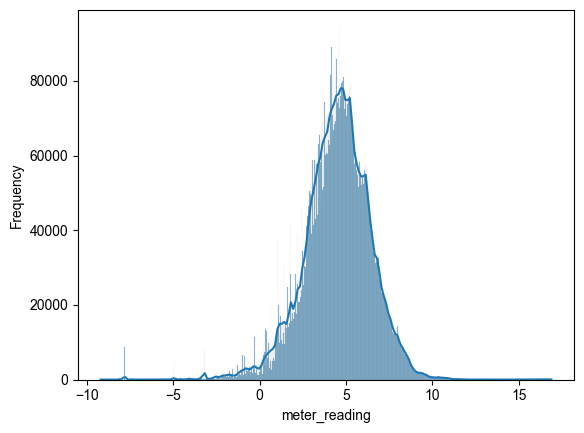

In [58]:
plot_histogram(train_df, 'meter_reading')

/Users/leannechen/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


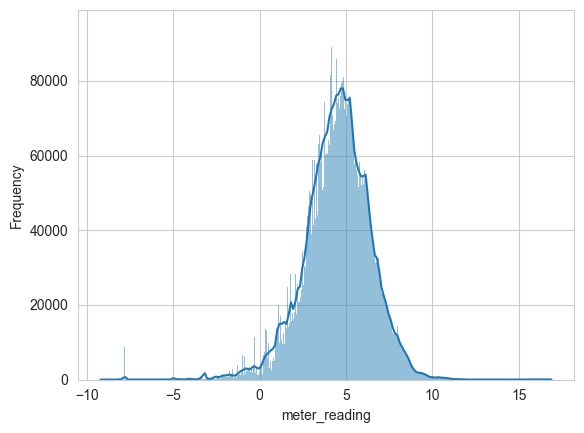

In [59]:
plot_histogram(train_merge, 'meter_reading')

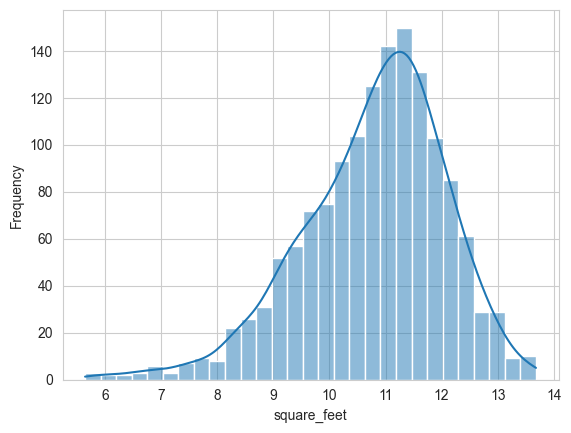

In [60]:
plot_histogram(building_meta_df, 'square_feet')

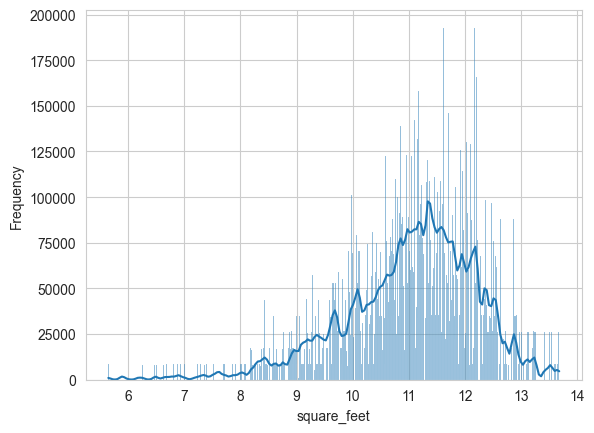

In [61]:
plot_histogram(train_merge, 'square_feet')

In [118]:
train_df['meter_reading'] = np.log1p(train_df['meter_reading'])
train_merge['meter_reading'] = np.log1p(train_merge['meter_reading'])
building_meta_df['square_feet'] = np.log1p(building_meta_df['square_feet'])
train_merge['square_feet'] = np.log1p(train_merge['square_feet'])

/Users/leannechen/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


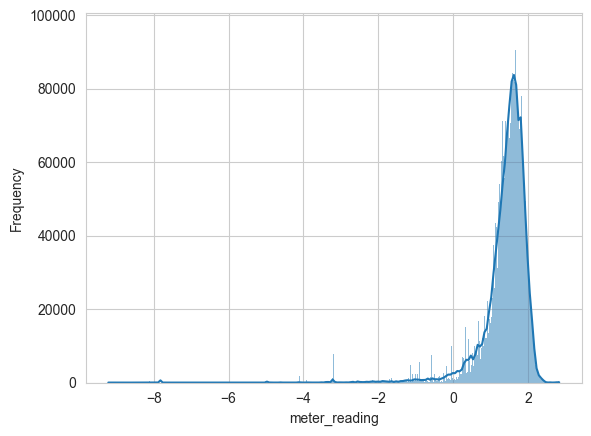

In [63]:
#After log_transformation
plot_histogram(train_df, 'meter_reading')

/Users/leannechen/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


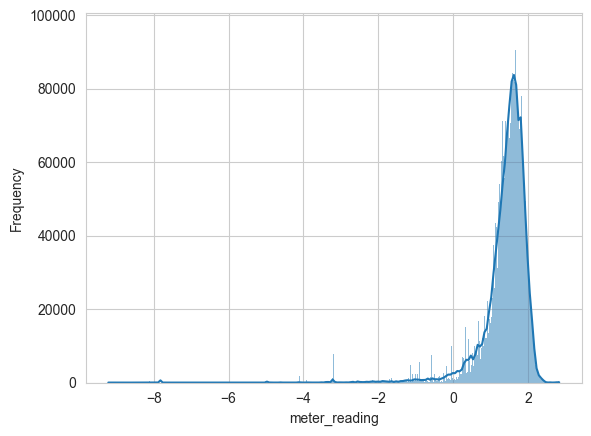

In [64]:
#After log_transformation
plot_histogram(train_merge, 'meter_reading')

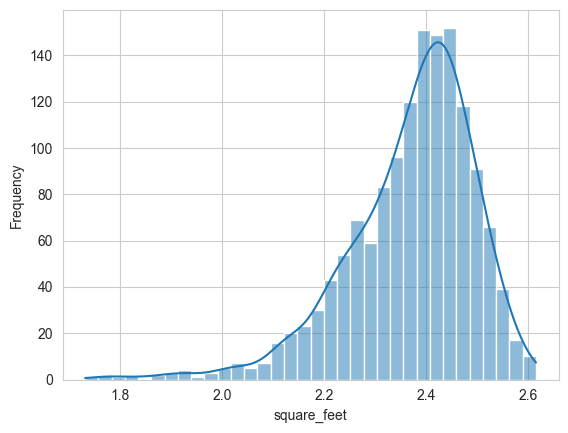

In [65]:
#After log_transformation
plot_histogram(building_meta_df, 'square_feet')

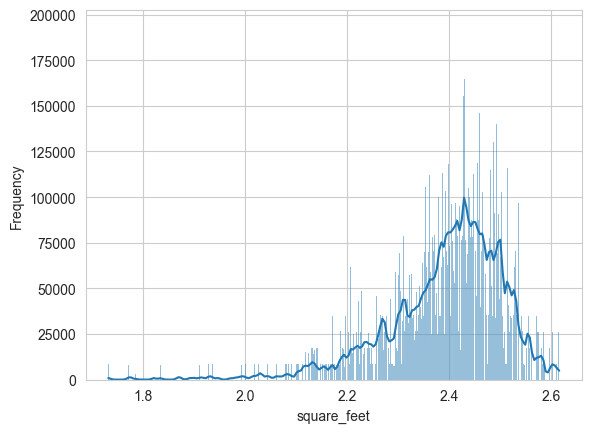

In [66]:
#After log_transformation
plot_histogram(train_merge, 'square_feet')

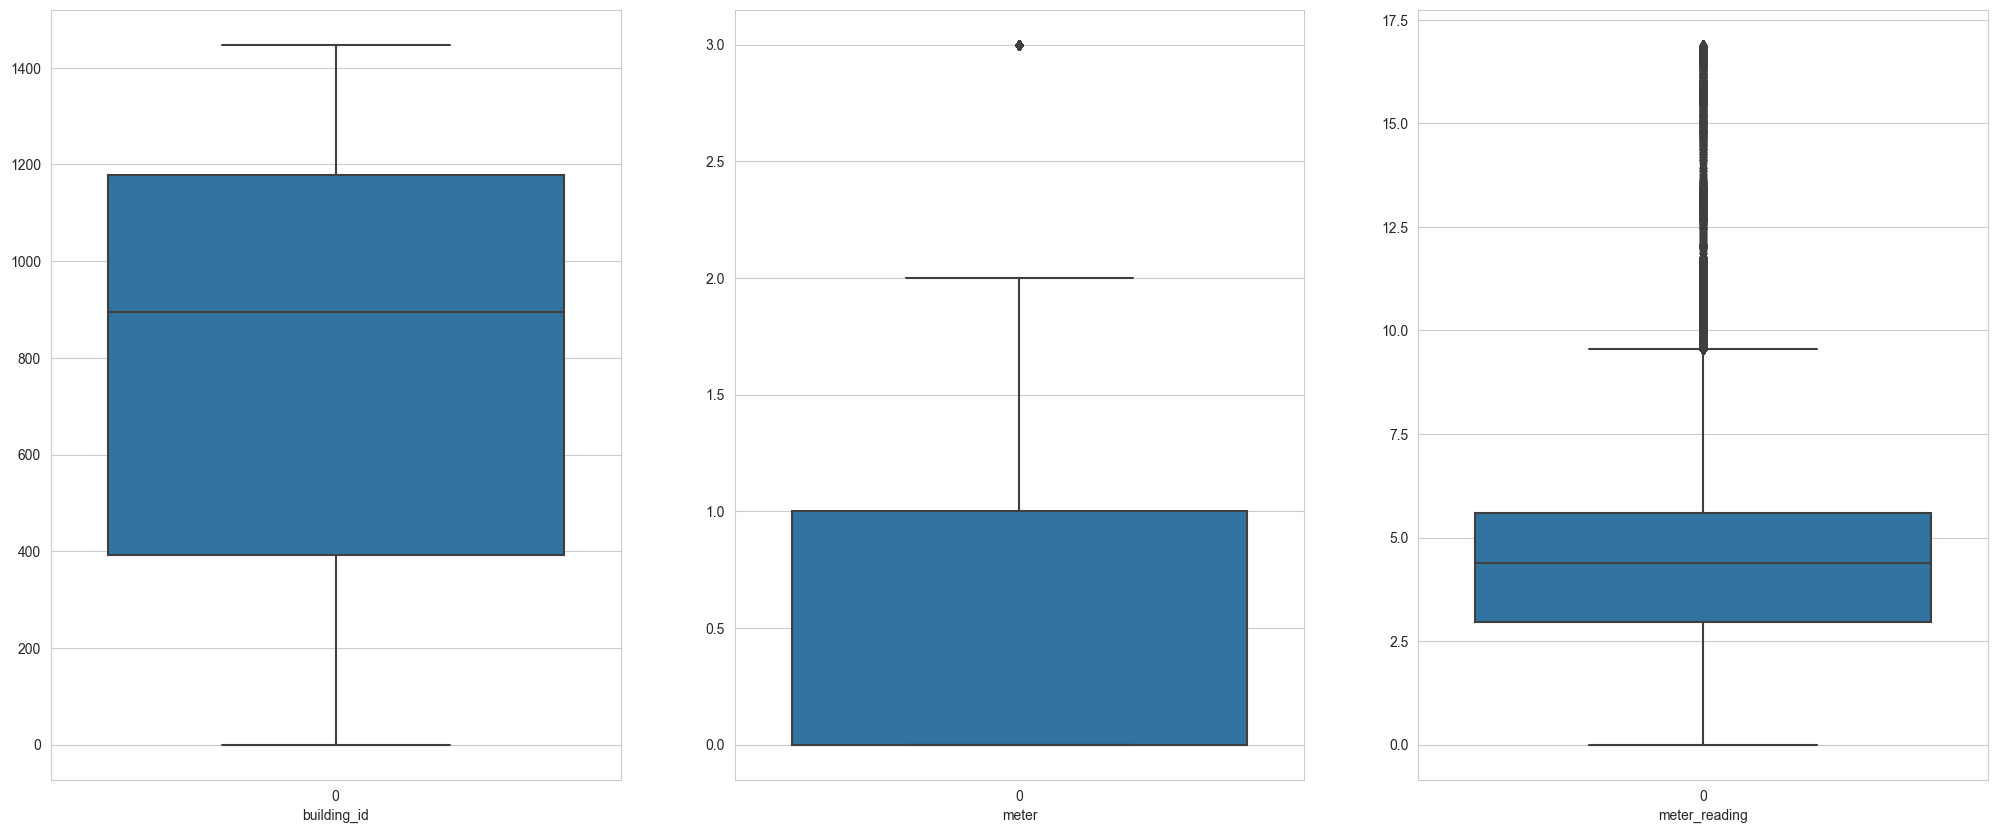

In [67]:
boxplot_func(train_df,['building_id', 'meter', 'meter_reading'])
plt.show()

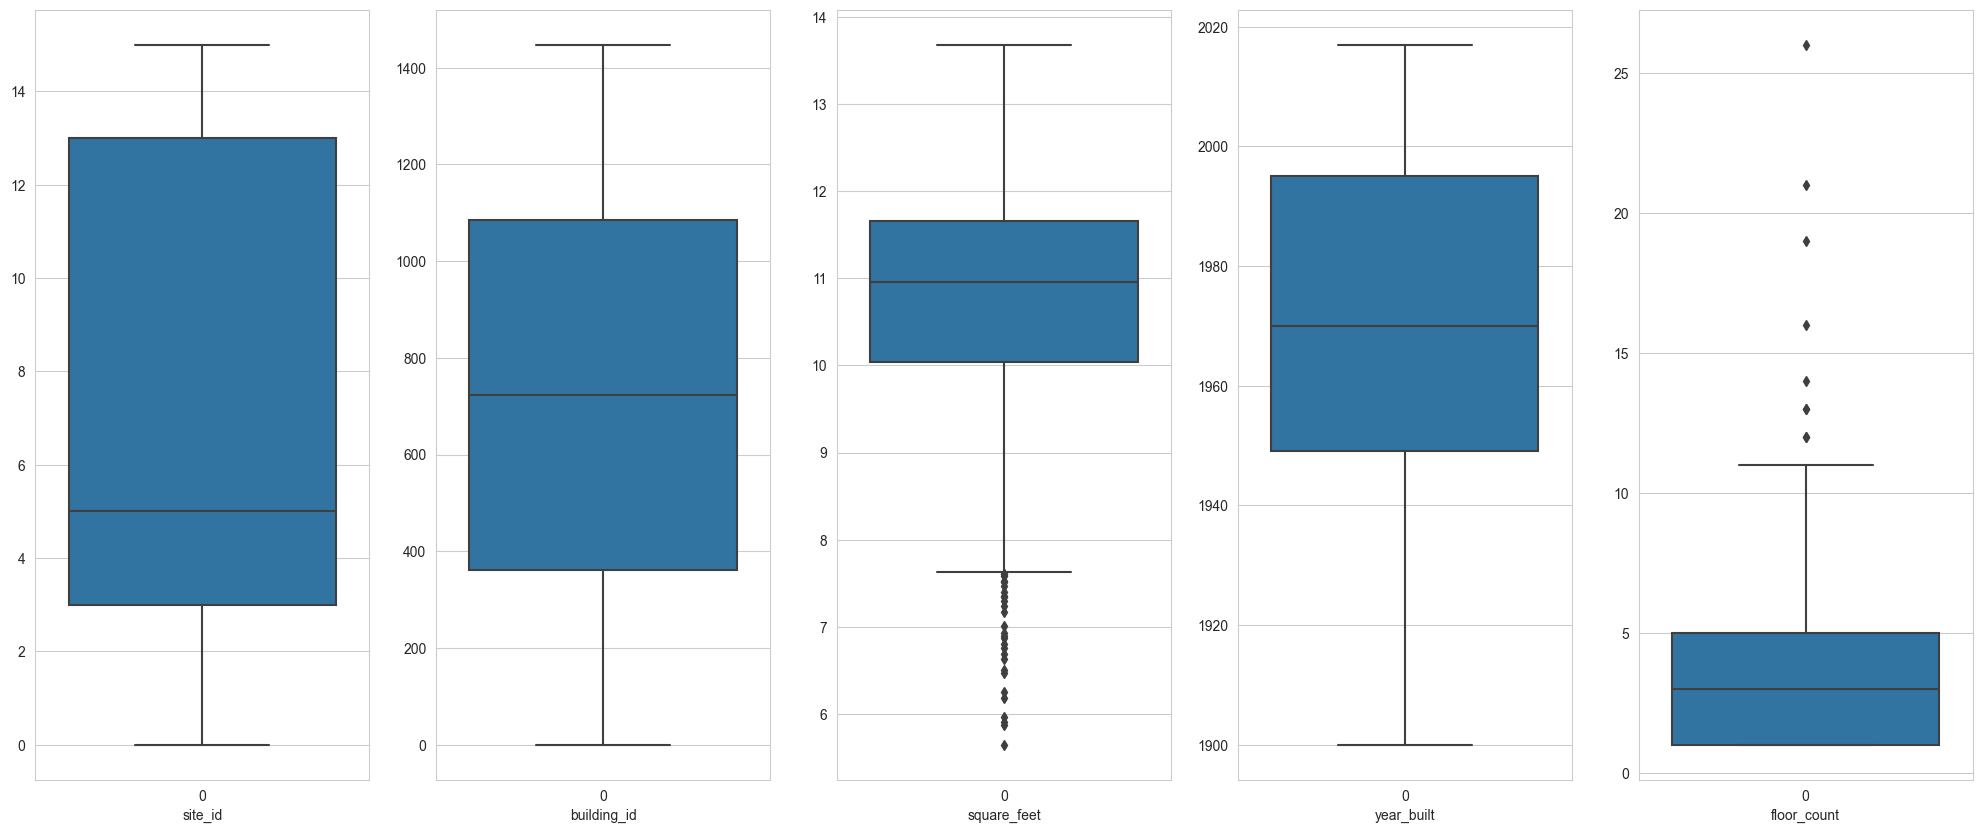

In [68]:
boxplot_func(building_meta_df,['site_id', 'building_id', 'square_feet', 'year_built',
       'floor_count'])
plt.show()

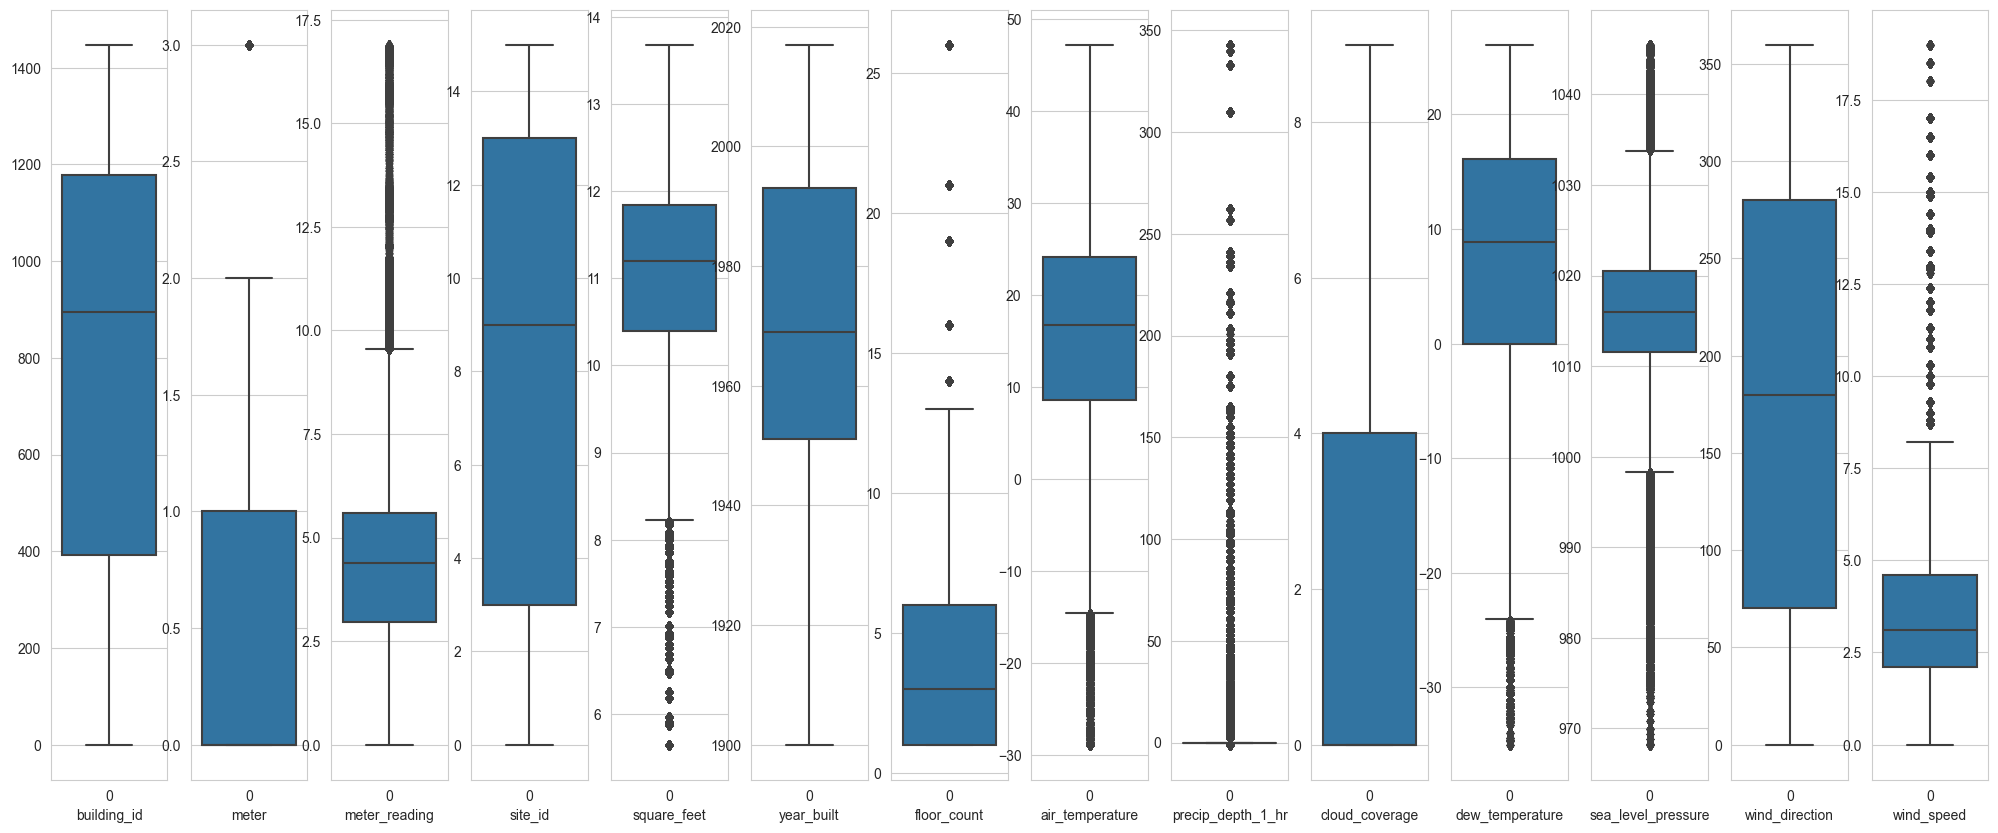

In [69]:
boxplot_func(train_merge,['building_id', 'meter', 'meter_reading', 'site_id',
       'square_feet', 'year_built', 'floor_count',
       'air_temperature','precip_depth_1_hr', 'cloud_coverage', 'dew_temperature',
       'sea_level_pressure', 'wind_direction',
       'wind_speed'])
plt.show()

In [70]:
print('---Summary after log transformation---')
train_df["meter_reading"].describe()

---Summary after log transformation---


count    2.021610e+07
mean     4.145761e+00
std      2.074255e+00
min      0.000000e+00
25%      2.960105e+00
50%      4.379210e+00
75%      5.594652e+00
max      1.690221e+01
Name: meter_reading, dtype: float64

In [71]:
print('---Summary after log transformation---')
train_merge["meter_reading"].describe()

---Summary after log transformation---


count    2.021610e+07
mean     4.145761e+00
std      2.074255e+00
min      0.000000e+00
25%      2.960105e+00
50%      4.379210e+00
75%      5.594652e+00
max      1.690221e+01
Name: meter_reading, dtype: float64

In [72]:
print('---Summary after log transformation---')
building_meta_df["square_feet"].describe()

---Summary after log transformation---


count    1449.000000
mean       10.789761
std         1.274648
min         5.648974
25%        10.043815
50%        10.962562
75%        11.658557
max        13.681980
Name: square_feet, dtype: float64

In [73]:
print('---Summary after log transformation---')
train_merge["square_feet"].describe()

---Summary after log transformation---


count    2.021610e+07
mean     1.103946e+01
std      1.180439e+00
min      5.648974e+00
25%      1.038986e+01
50%      1.119423e+01
75%      1.184305e+01
max      1.368198e+01
Name: square_feet, dtype: float64

Boxplot Without outliers 

In [74]:
def plot_boxplots(df):
    # Get list of numeric columns
    numeric_cols = list(df.select_dtypes(include='number').columns)
    # Calculate number of subplots
    num_plots = len(numeric_cols)
    num_rows = num_plots // 3 + 1 if num_plots % 3 != 0 else num_plots // 3
    # Create subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
    axes = axes.flatten()
    # Loop through numeric columns and plot boxplots
    for i, col in enumerate(numeric_cols):
        sns.boxplot(y=col, data=df, ax=axes[i], showfliers=False)
        axes[i].set_xlabel(col, fontsize=18)
    # Remove unused subplots
    for j in range(num_plots, num_rows*3):
        fig.delaxes(axes[j])
    fig.suptitle("Boxplots without outliers",fontsize=25)
    plt.show()

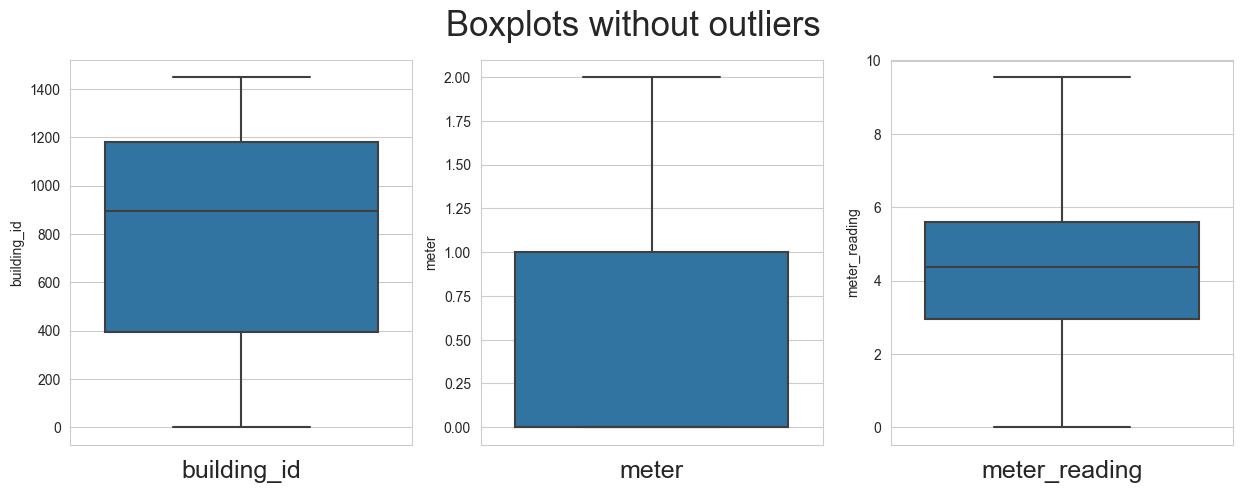

In [75]:
plot_boxplots(train_df)

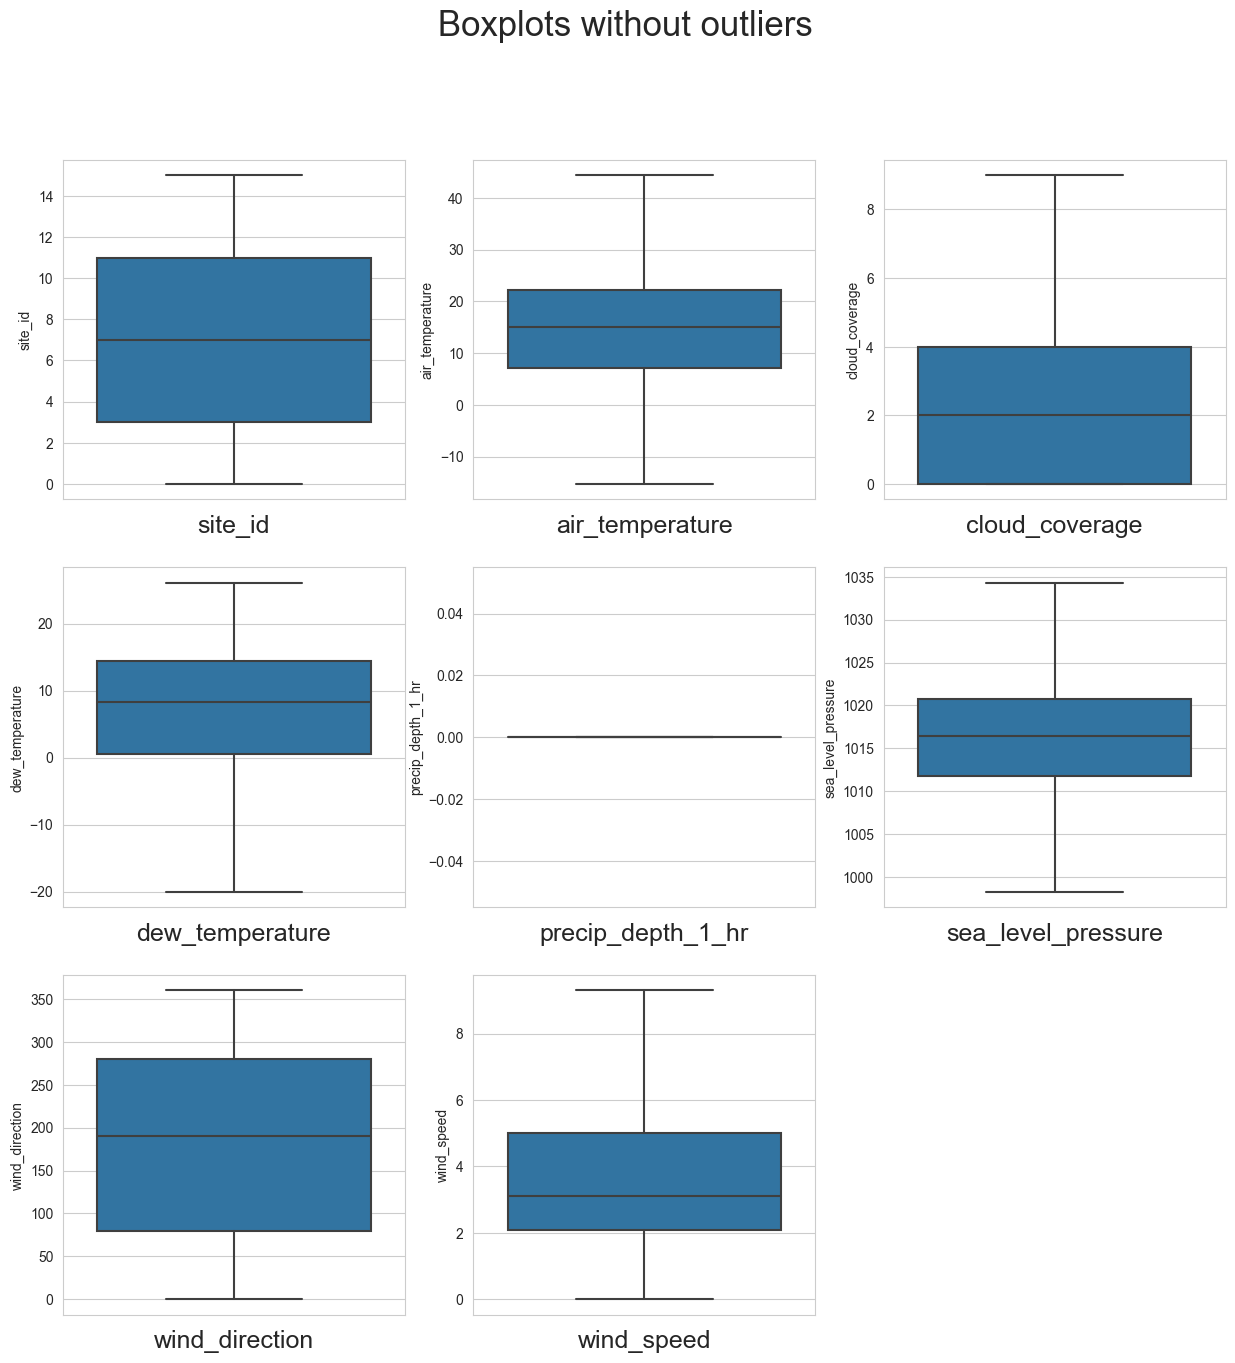

In [76]:
plot_boxplots(weather_train_df)

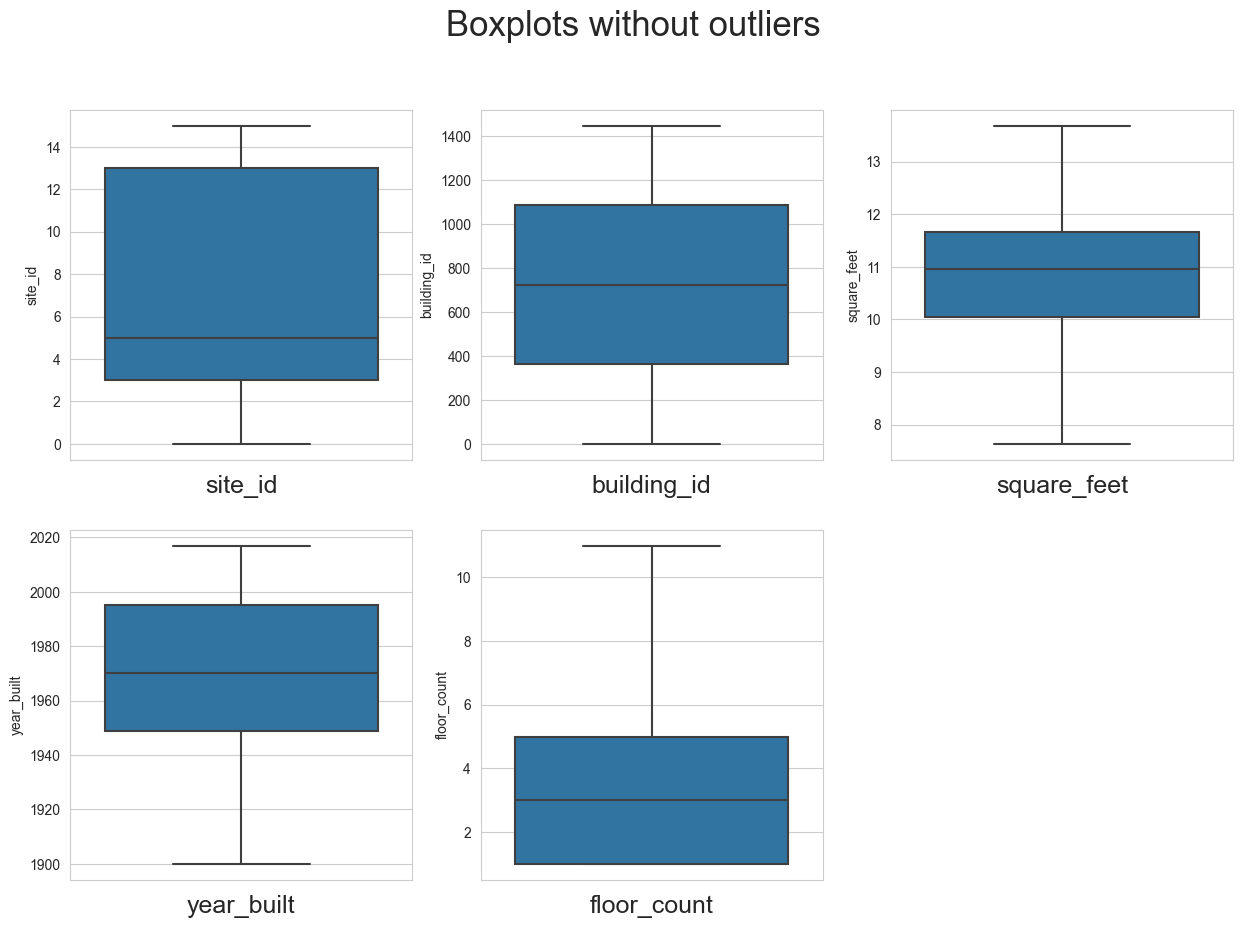

In [77]:
plot_boxplots(building_meta_df)

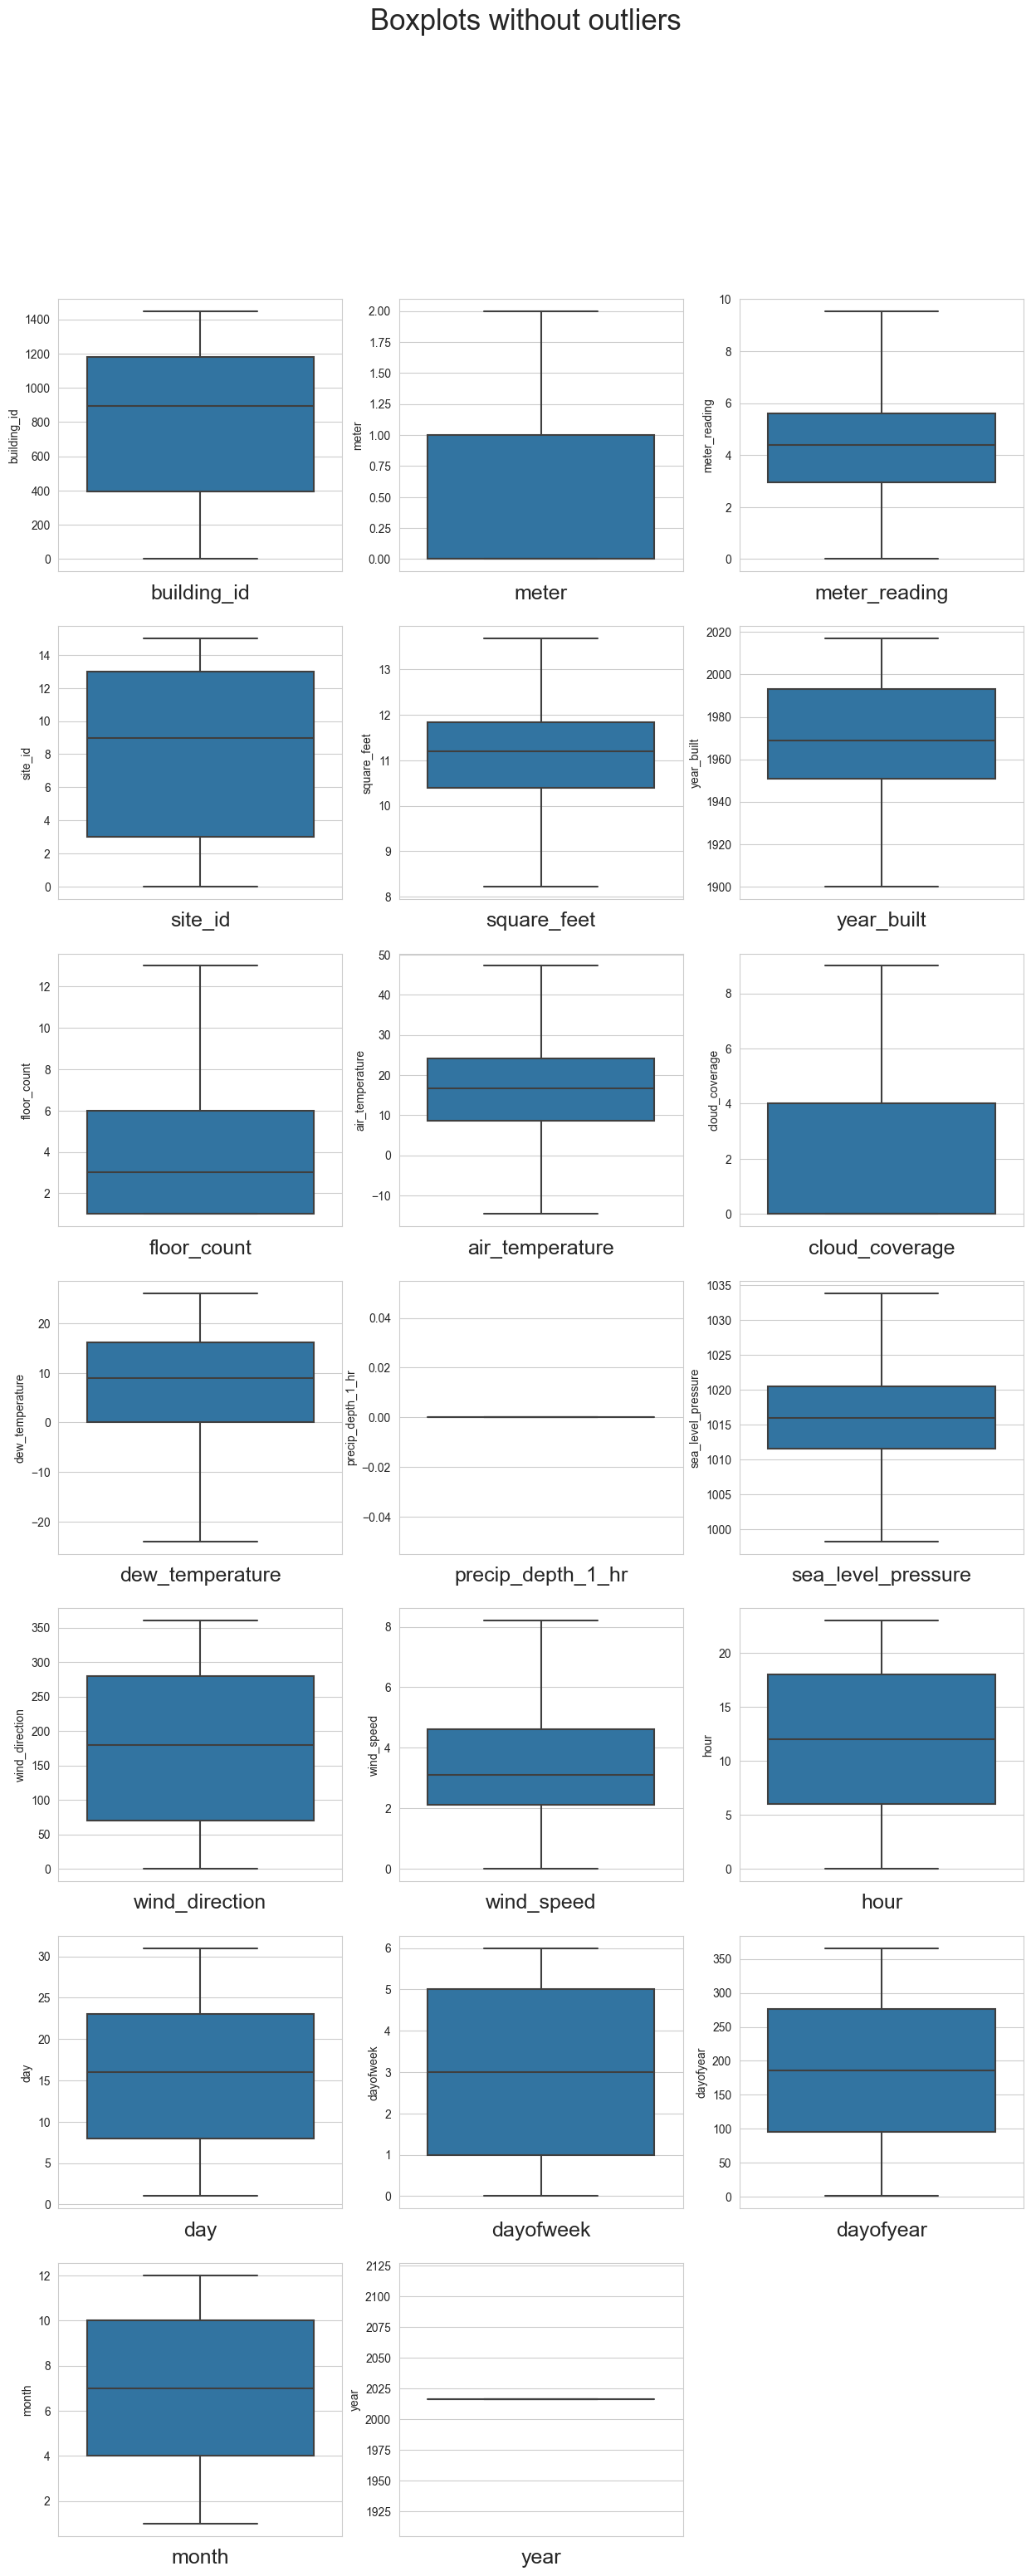

In [78]:
plot_boxplots(train_merge)

# Analysis of train data 

meter

Text(0.5, 1.0, 'Count values per meter ')

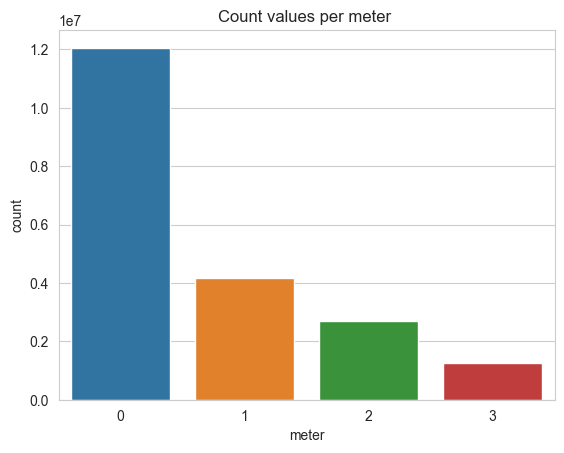

In [79]:
sns.countplot(x="meter", data=train_merge)
plt.title('Count values per meter ')

There is only few data on meter 3.
{0: electricity, 1: chilledwater, 2: steam, 3: hotwater}

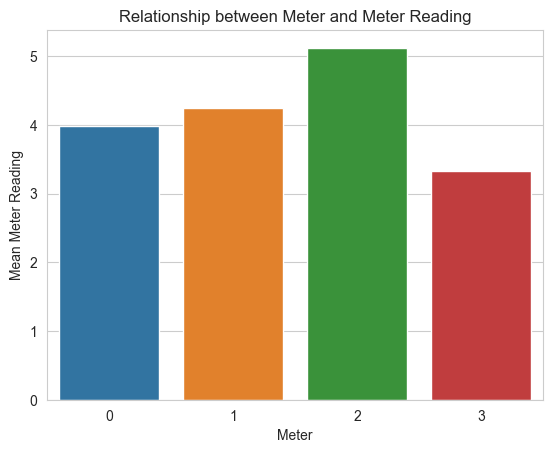

In [80]:
grouped_data = train_merge.groupby('meter')['meter_reading'].mean()
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.xlabel('Meter')
plt.ylabel('Mean Meter Reading')
plt.title('Relationship between Meter and Meter Reading')
plt.show()

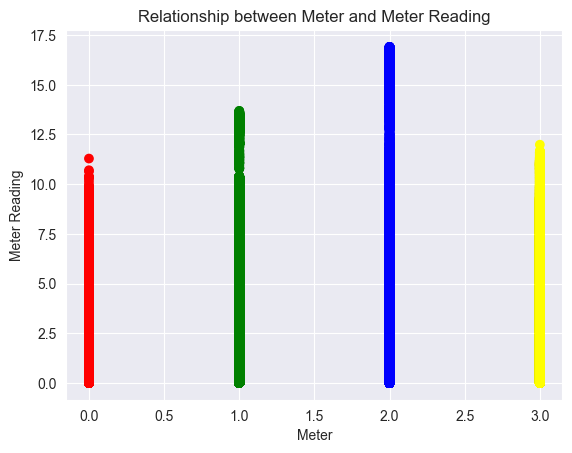

In [131]:
colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow'}

Meter 2 has the huge difference in terms of min and max

In [81]:
def plot_grouped_data(df, groupby_col, groupby_values, agg_col, agg_func, n_rows, n_cols, fig_size):
    # Create the subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=fig_size)
    axes = axes.flatten()
    # Iterate over the groupby values
    for i, ax in zip(groupby_values, axes):
        # Group the data and calculate the mean for each timestamp
        grouped_df = df[df[groupby_col] == i].groupby('timestamp').agg({agg_col: agg_func}).reset_index()
        # Plot the hourly mean
        sns.lineplot(data=grouped_df, y=agg_col, x='timestamp', ax=ax, label='hour')
        # Plot the daily mean
        sns.lineplot(data=grouped_df.resample('D', on='timestamp').mean().reset_index(), y=agg_col, x='timestamp', ax=ax, label='day')
        # Set the title
        ax.set_title(f"{groupby_col}_{i}")
    plt.tight_layout()
    plt.show()

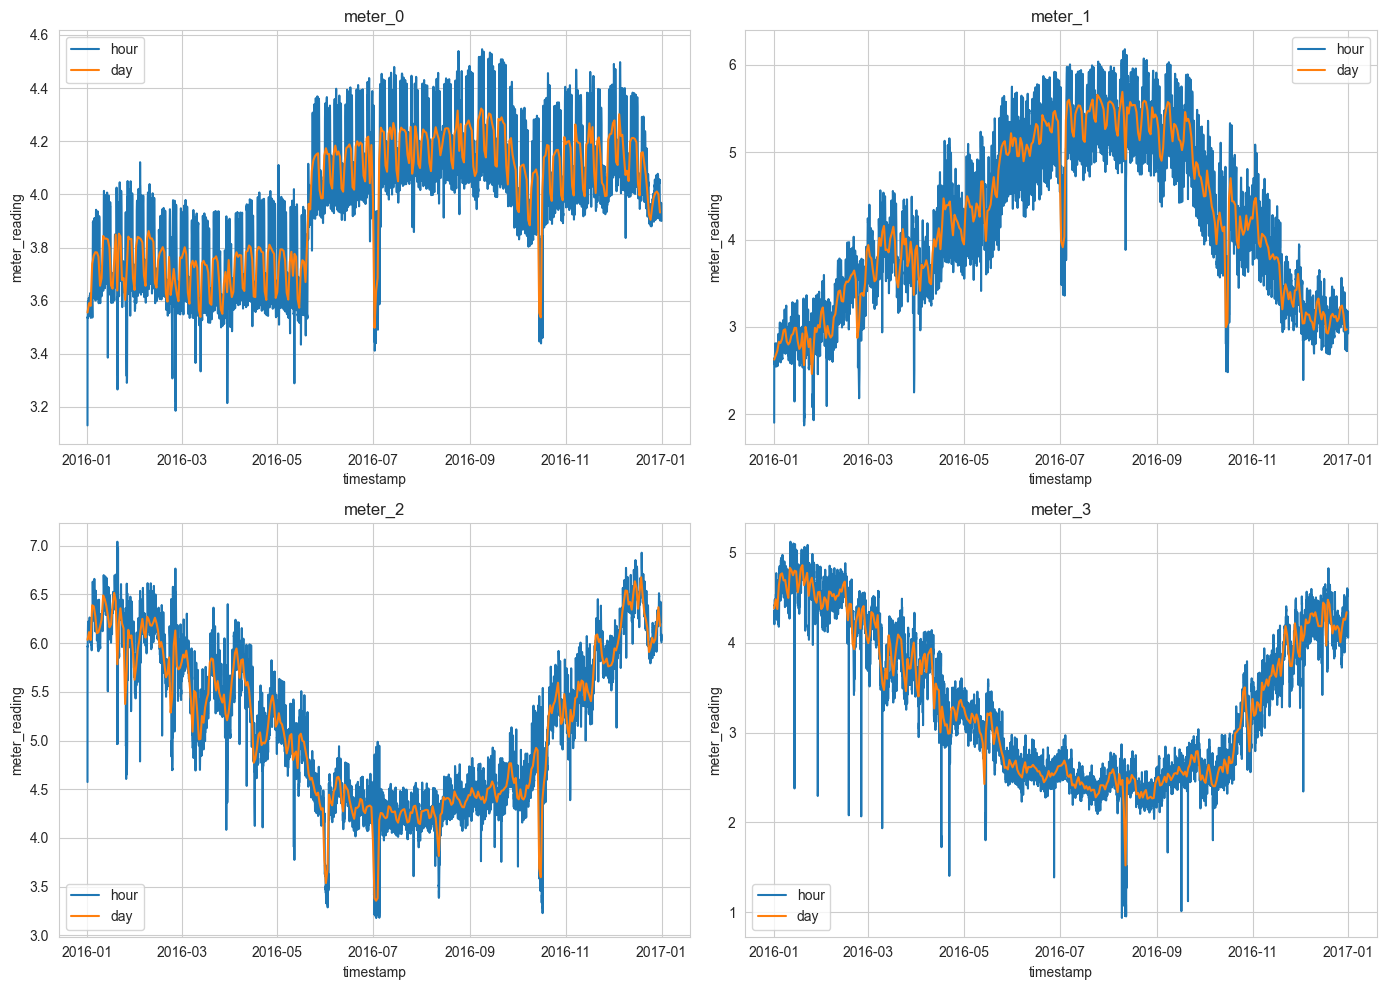

In [82]:
plot_grouped_data(train_merge, 'meter', range(4), 'meter_reading', 'mean', 2, 2, (14, 10))

Site_id 

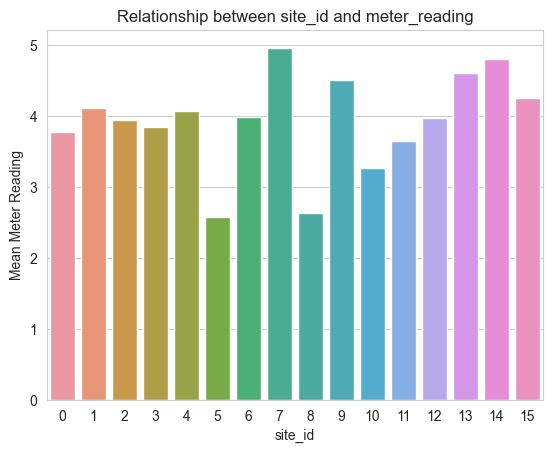

In [83]:
grouped_data = train_merge.groupby('site_id')['meter_reading'].mean()
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.xlabel('site_id')
plt.ylabel('Mean Meter Reading')
plt.title('Relationship between site_id and meter_reading')
plt.show()

In [121]:
del grouped_data
gc.collect()

14265

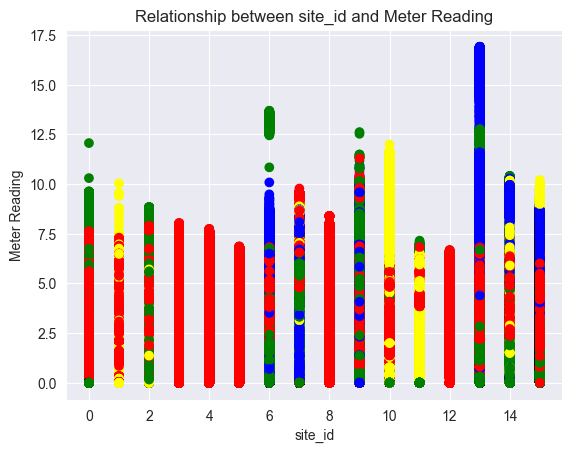

In [132]:
fig, ax = plt.subplots()
ax.scatter(train_merge['site_id'], train_merge['meter_reading'], c=train_merge['meter'].apply(lambda x: colors[x]))
ax.set_title('Relationship between site_id and Meter Reading')
ax.set_xlabel('site_id')
ax.set_ylabel('Meter Reading')
plt.show()

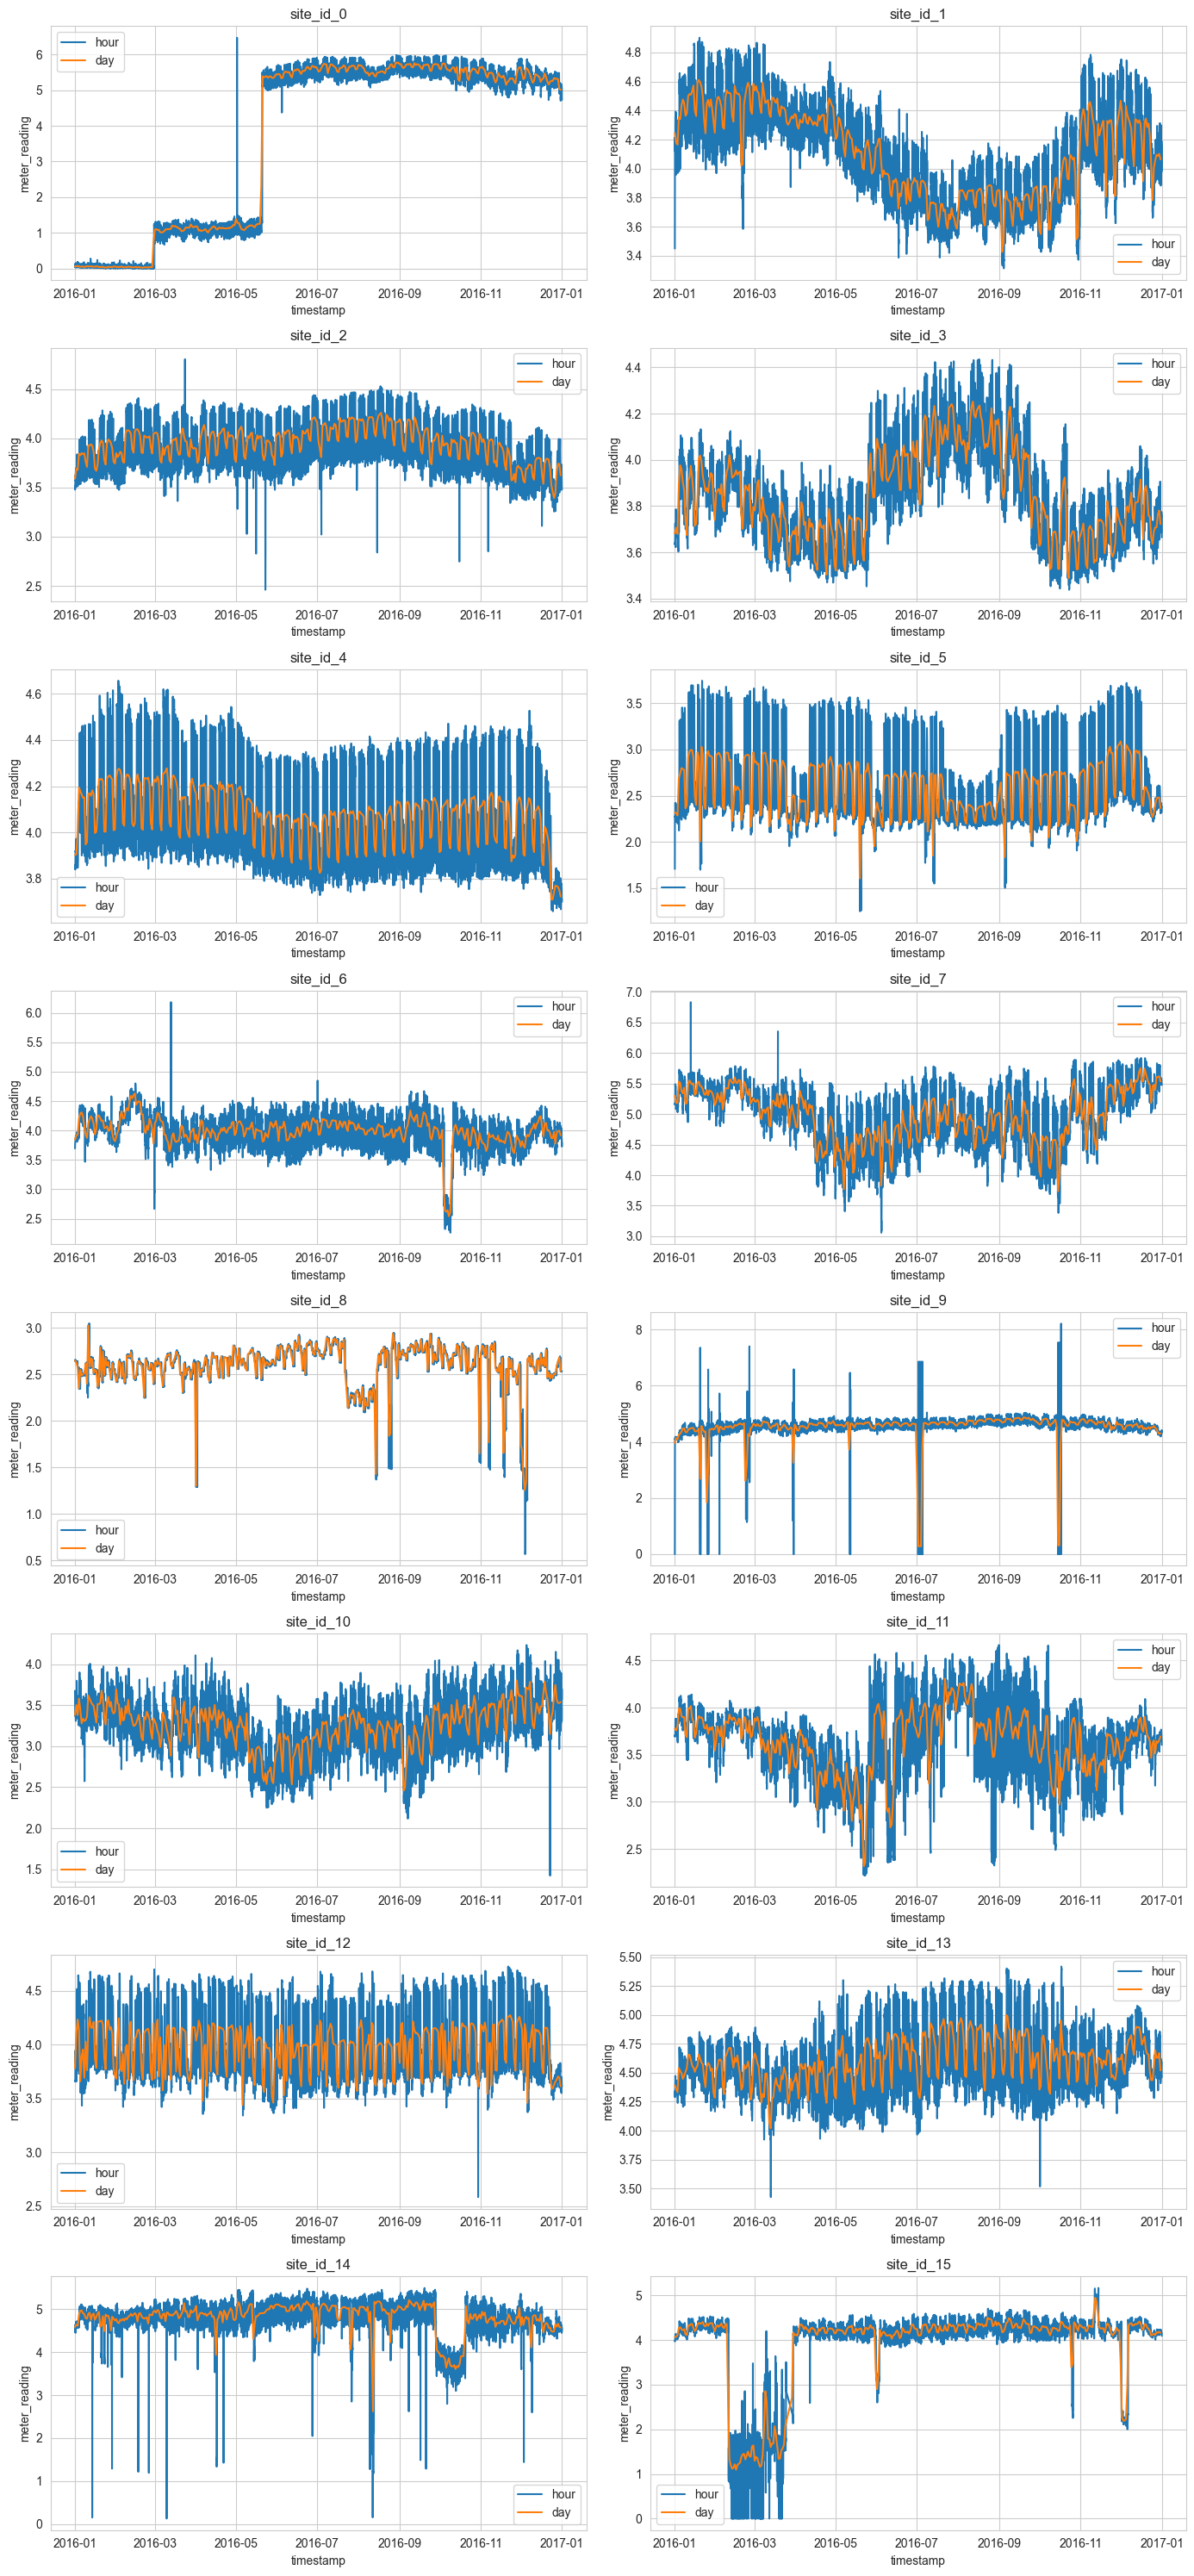

In [84]:
plot_grouped_data(train_merge, 'site_id', range(16), 'meter_reading', 'mean', 8, 2, (14, 30))

primary_use

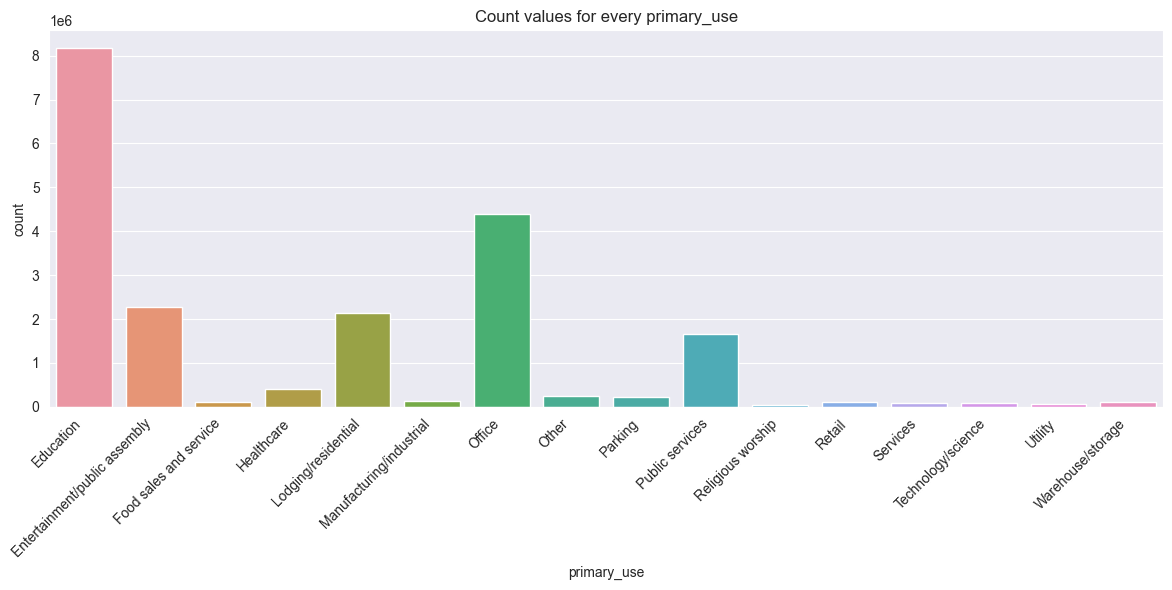

In [85]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="primary_use", data=train_merge)
plt.title('Count values for every primary_use')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

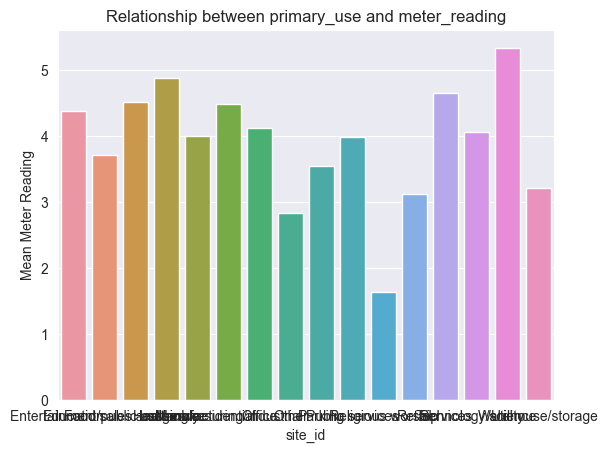

In [133]:
grouped_data = train_merge.groupby('primary_use')['meter_reading'].mean()
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.xlabel('site_id')
plt.ylabel('Mean Meter Reading')
plt.title('Relationship between primary_use and meter_reading')
plt.show()

In [88]:
use_to_num={
    'Education':0,
    'Entertainment/public assembly':1,
    'Food sales and service':2,
    'Healtcare':3,
    'Lodging/residential':4,
    'Manufacturing/industrial':5,
    'Office':6,
    'Other':7,
    'Parking':8,
    "Public service":9,
    'Religious workship':10,
    'Retail':11,
    'Service':12,
    'Technology/Science':13,
    'Utility':14,
    'Warehouse/storage':15
}

In [89]:
if train_merge['primary_use'].dtype.name == 'category':
    # Map the categories to integers using the dictionary and the map() method
    train_merge['primary_use'] = train_merge['primary_use'].map(use_to_num)
    # Convert the primary_use column to integer data type
    train_merge['primary_use'] = train_merge['primary_use'].astype(int)

In [ ]:
plot_grouped_data(train_merge, 'primary_use', range(16), 'meter_reading', 'mean', 8, 2, (14, 30))